# VERSO Step#2 - Dataset PRJNA613958

# Article: "Mutational signatures and heterogeneous host response revealed via large-scale characterization of SARS-CoV-2 genomic diversity"
# Authors Alex Graudenzi, Davide Maspero, Fabrizio Angaroni, Rocco Piazza, Daniele Ramazzotti. 
# Preprint available at : https://www.biorxiv.org/content/10.1101/2020.07.06.189944v1

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Loading the libraries

In [3]:
#Set working directory
import os
os.chdir(os.getcwd())
os.getcwd()

'/Users/alexgraudenzi/Desktop/SCANPY_COVID'

In [4]:
#Initialization of session save/storing
import dill
import pickle
import gc
gc.collect()

5

In [5]:
pickle.HIGHEST_PROTOCOL

4

In [6]:
#pip install leidenalg

In [7]:
#import 
import scanpy as sc
import leidenalg
import scanpy.external as sce
import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axxx
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
#from gprofiler import GProfiler
import anndata as an
from pybiomart import Dataset

In [8]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(dpi=400, dpi_save=500)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.8.2 louvain==0.6.1


In [9]:
import matplotlib.cm as cm

def colormap(fig,nax):
    ax1=fig.get_axes()[nax]
    clim=ax1.get_children()[0].get_clim()
    cnorm=colors.Normalize(clim[0],clim[1])
    fig.colorbar(cm.ScalarMappable(norm=cnorm, cmap=None), ax=ax1)
    fig.delaxes(fig.get_axes()[-2])

## Input data



In [10]:
filename1="VF_matrix_AUS.csv"
filename4="assignments_AUS.txt"
filename5 = "metadata_AUS.csv"


In [11]:
data_all = pd.read_csv(filename1, header=0, sep=',')
assignments = pd.read_csv(filename4, header=0, sep='\t')
metadata = pd.read_csv(filename5, header=0, sep=',')



In [12]:
data_all.set_index("Unnamed: 0", drop=True, inplace=True)
assignments.set_index("Unnamed: 0", drop=True, inplace=True)
metadata.set_index("Unnamed: 0", drop=True, inplace=True)


In [13]:
adata_all=an.AnnData(data_all.T)
adata_all.var_names_make_unique()
adata_all.obs_names_make_unique()

In [14]:
adata_all.obs['Country'] = 'NA'
adata_all.obs['DateGISAID'] = 'NA'
adata_all.obs['Signature_Cluster'] = 'NA'
adata_all.obs['Clade'] = 'NA'
adata_all.obs['nClonal'] = 'NA'
adata_all.obs['nMinor'] = 'NA'

In [15]:
adata_all.obs['Clade'][:] = assignments['VersoCluster']
adata_all.obs['Signature_Cluster'][:] = assignments['SignatureCluster']
adata_all.obs['nClonal'][:] = assignments['nClonal']
adata_all.obs['nMinor'][:] = assignments['nMinor']

/Users/alexgraudenzi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


13

C01
AnnData object with n_obs × n_vars = 52 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 52
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 52
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 6 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


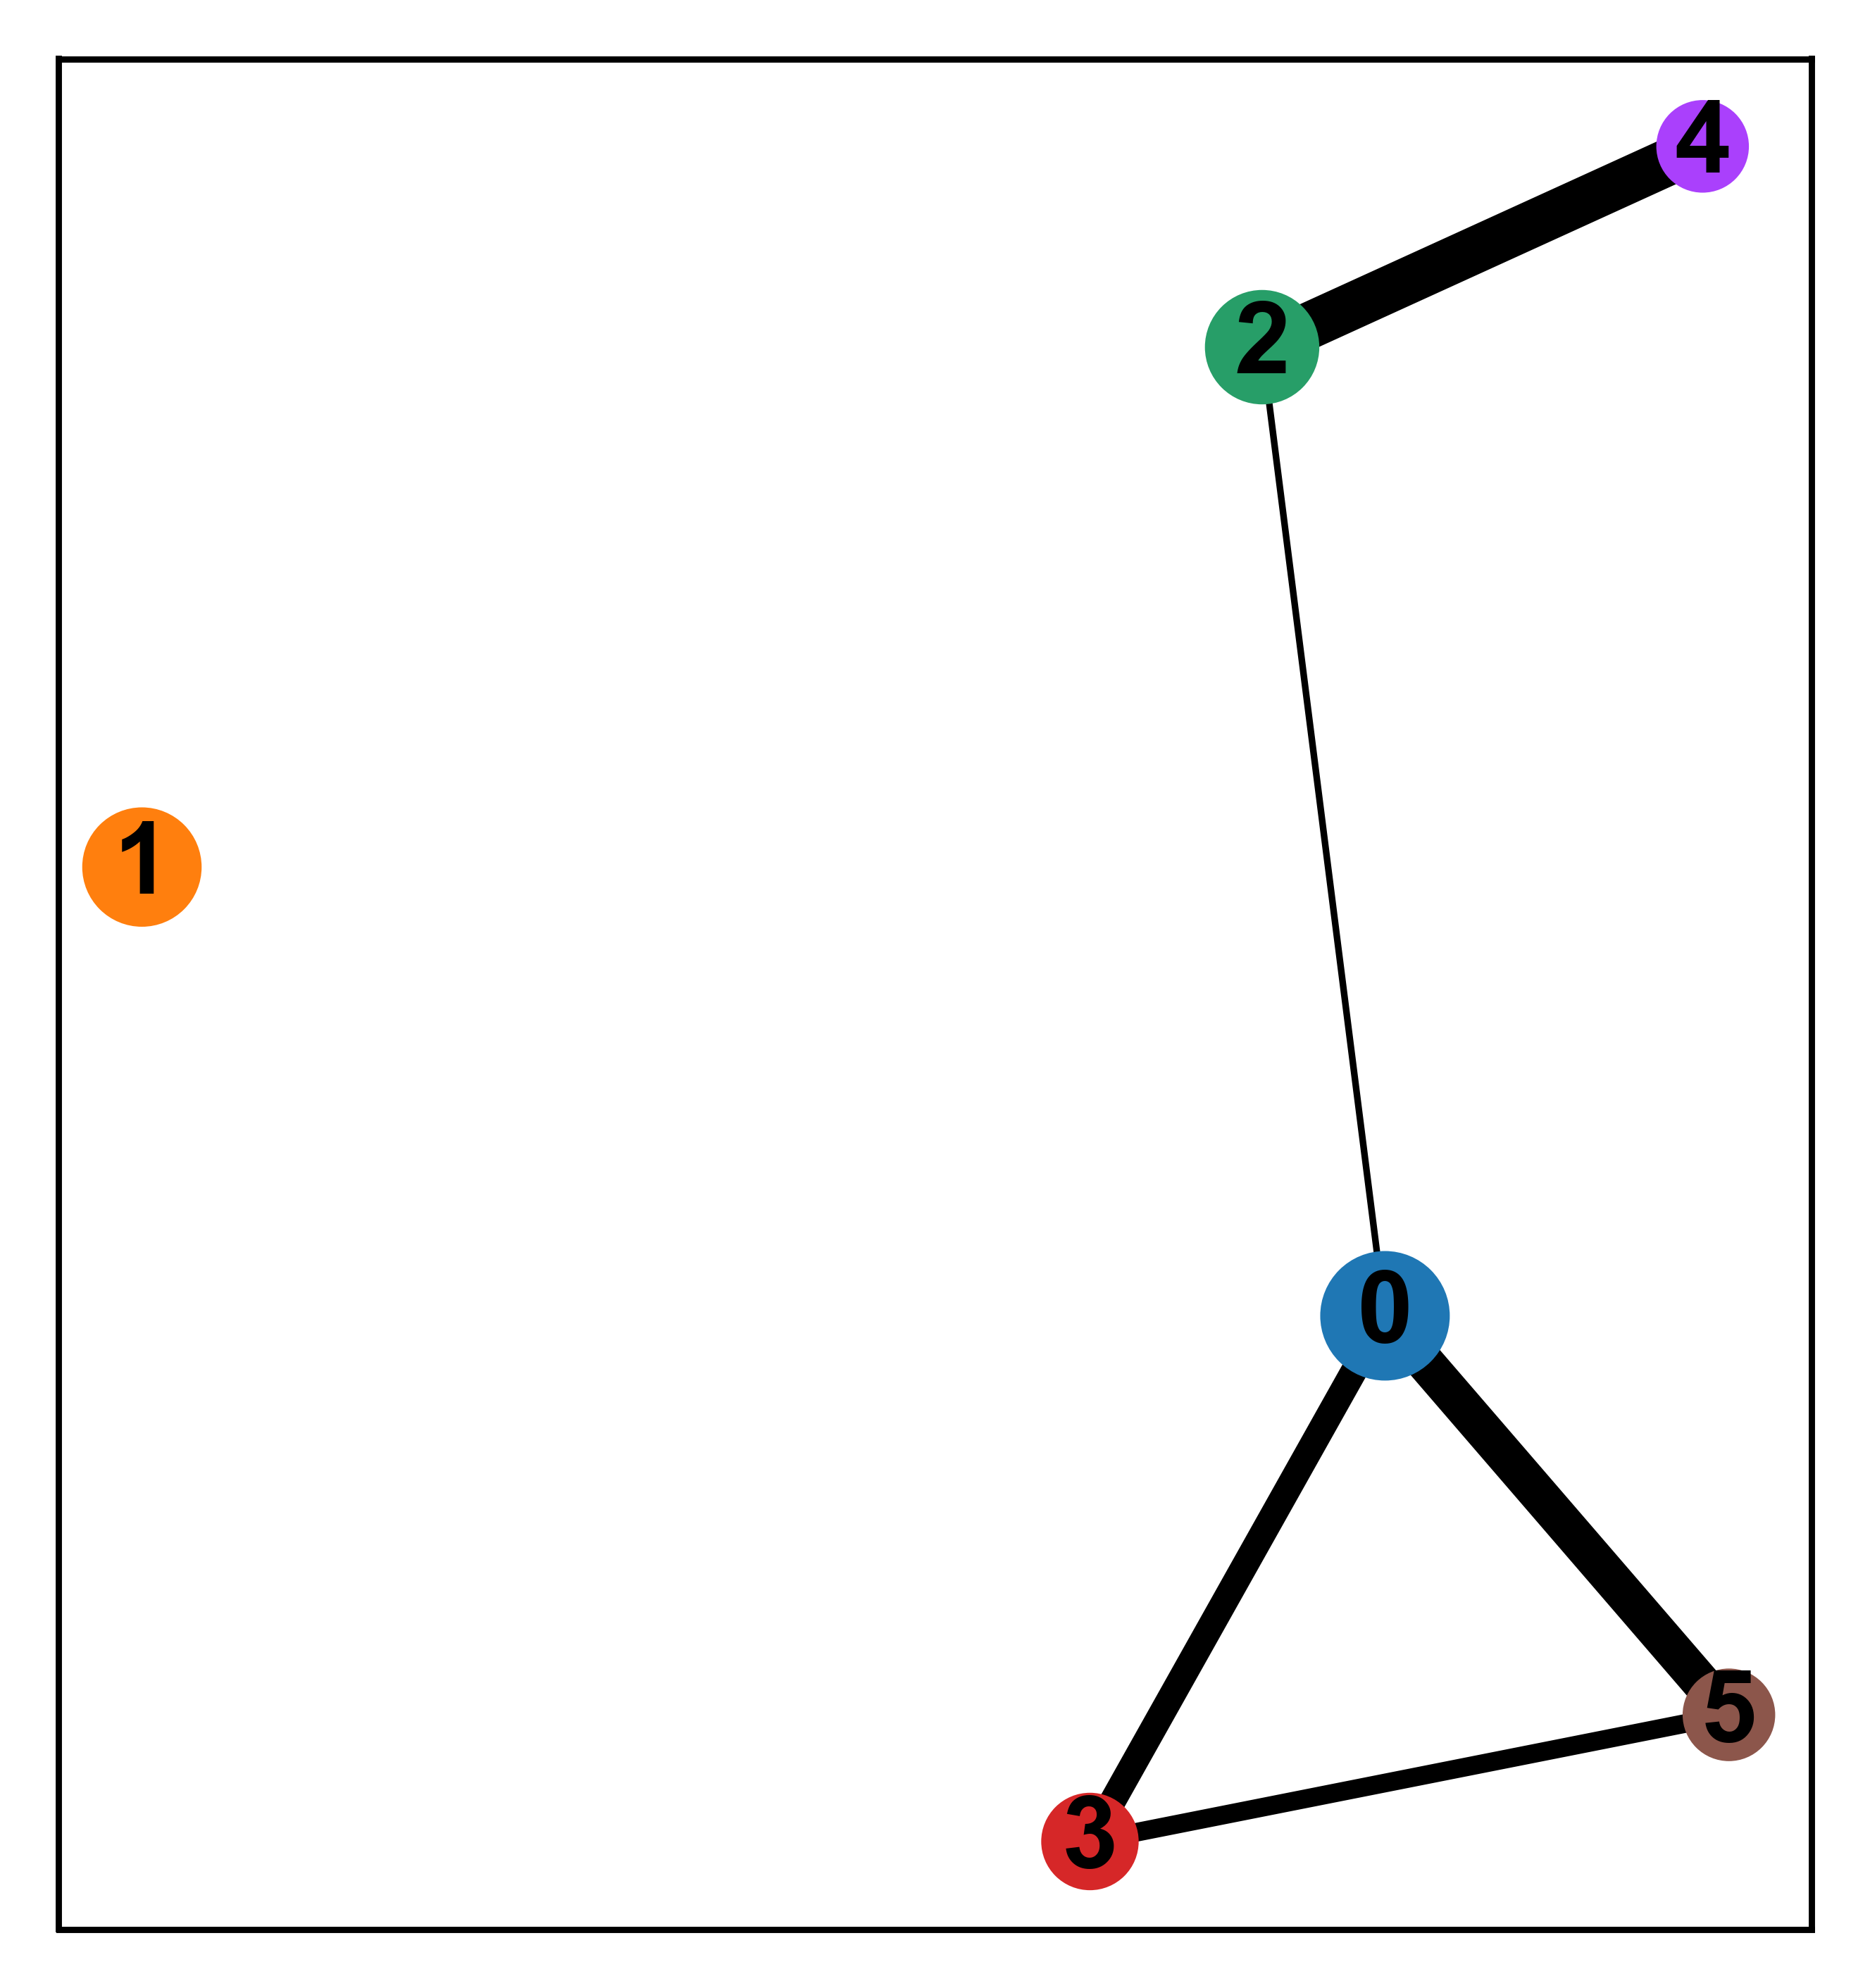

computing UMAP


/Users/alexgraudenzi/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


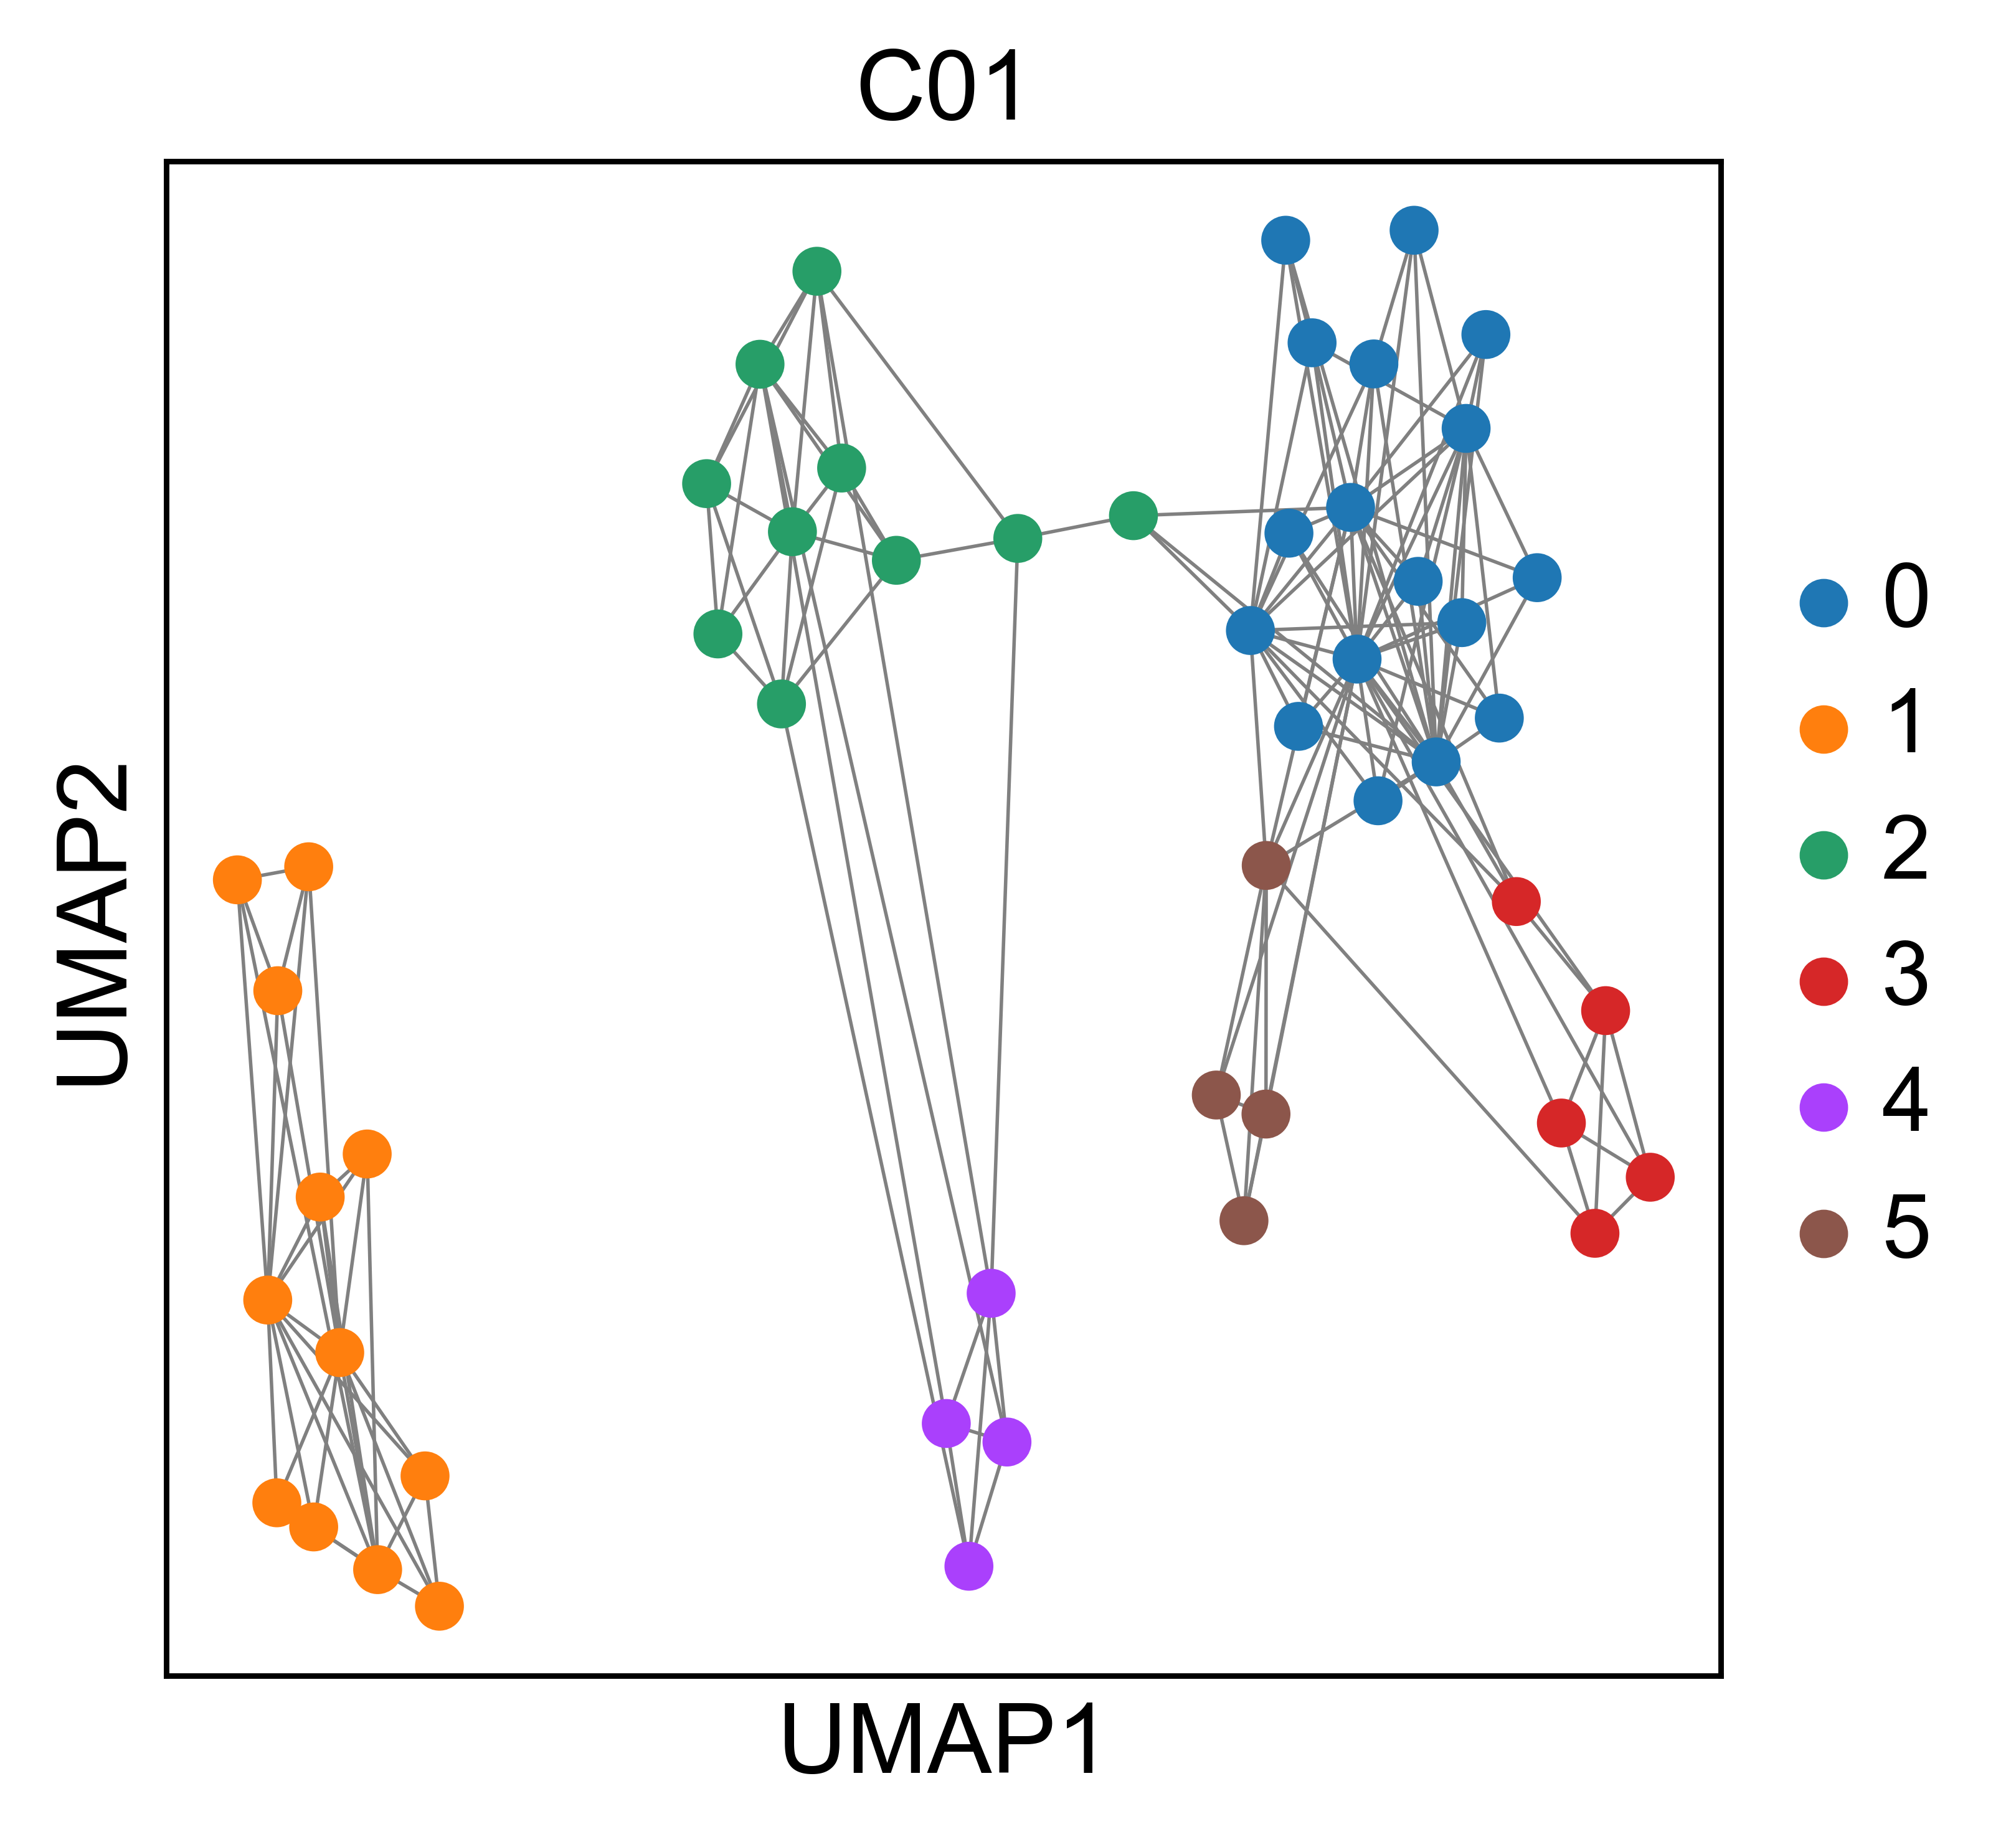

writing '.csv' files to outputC01


C02
AnnData object with n_obs × n_vars = 41 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 41
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 41
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


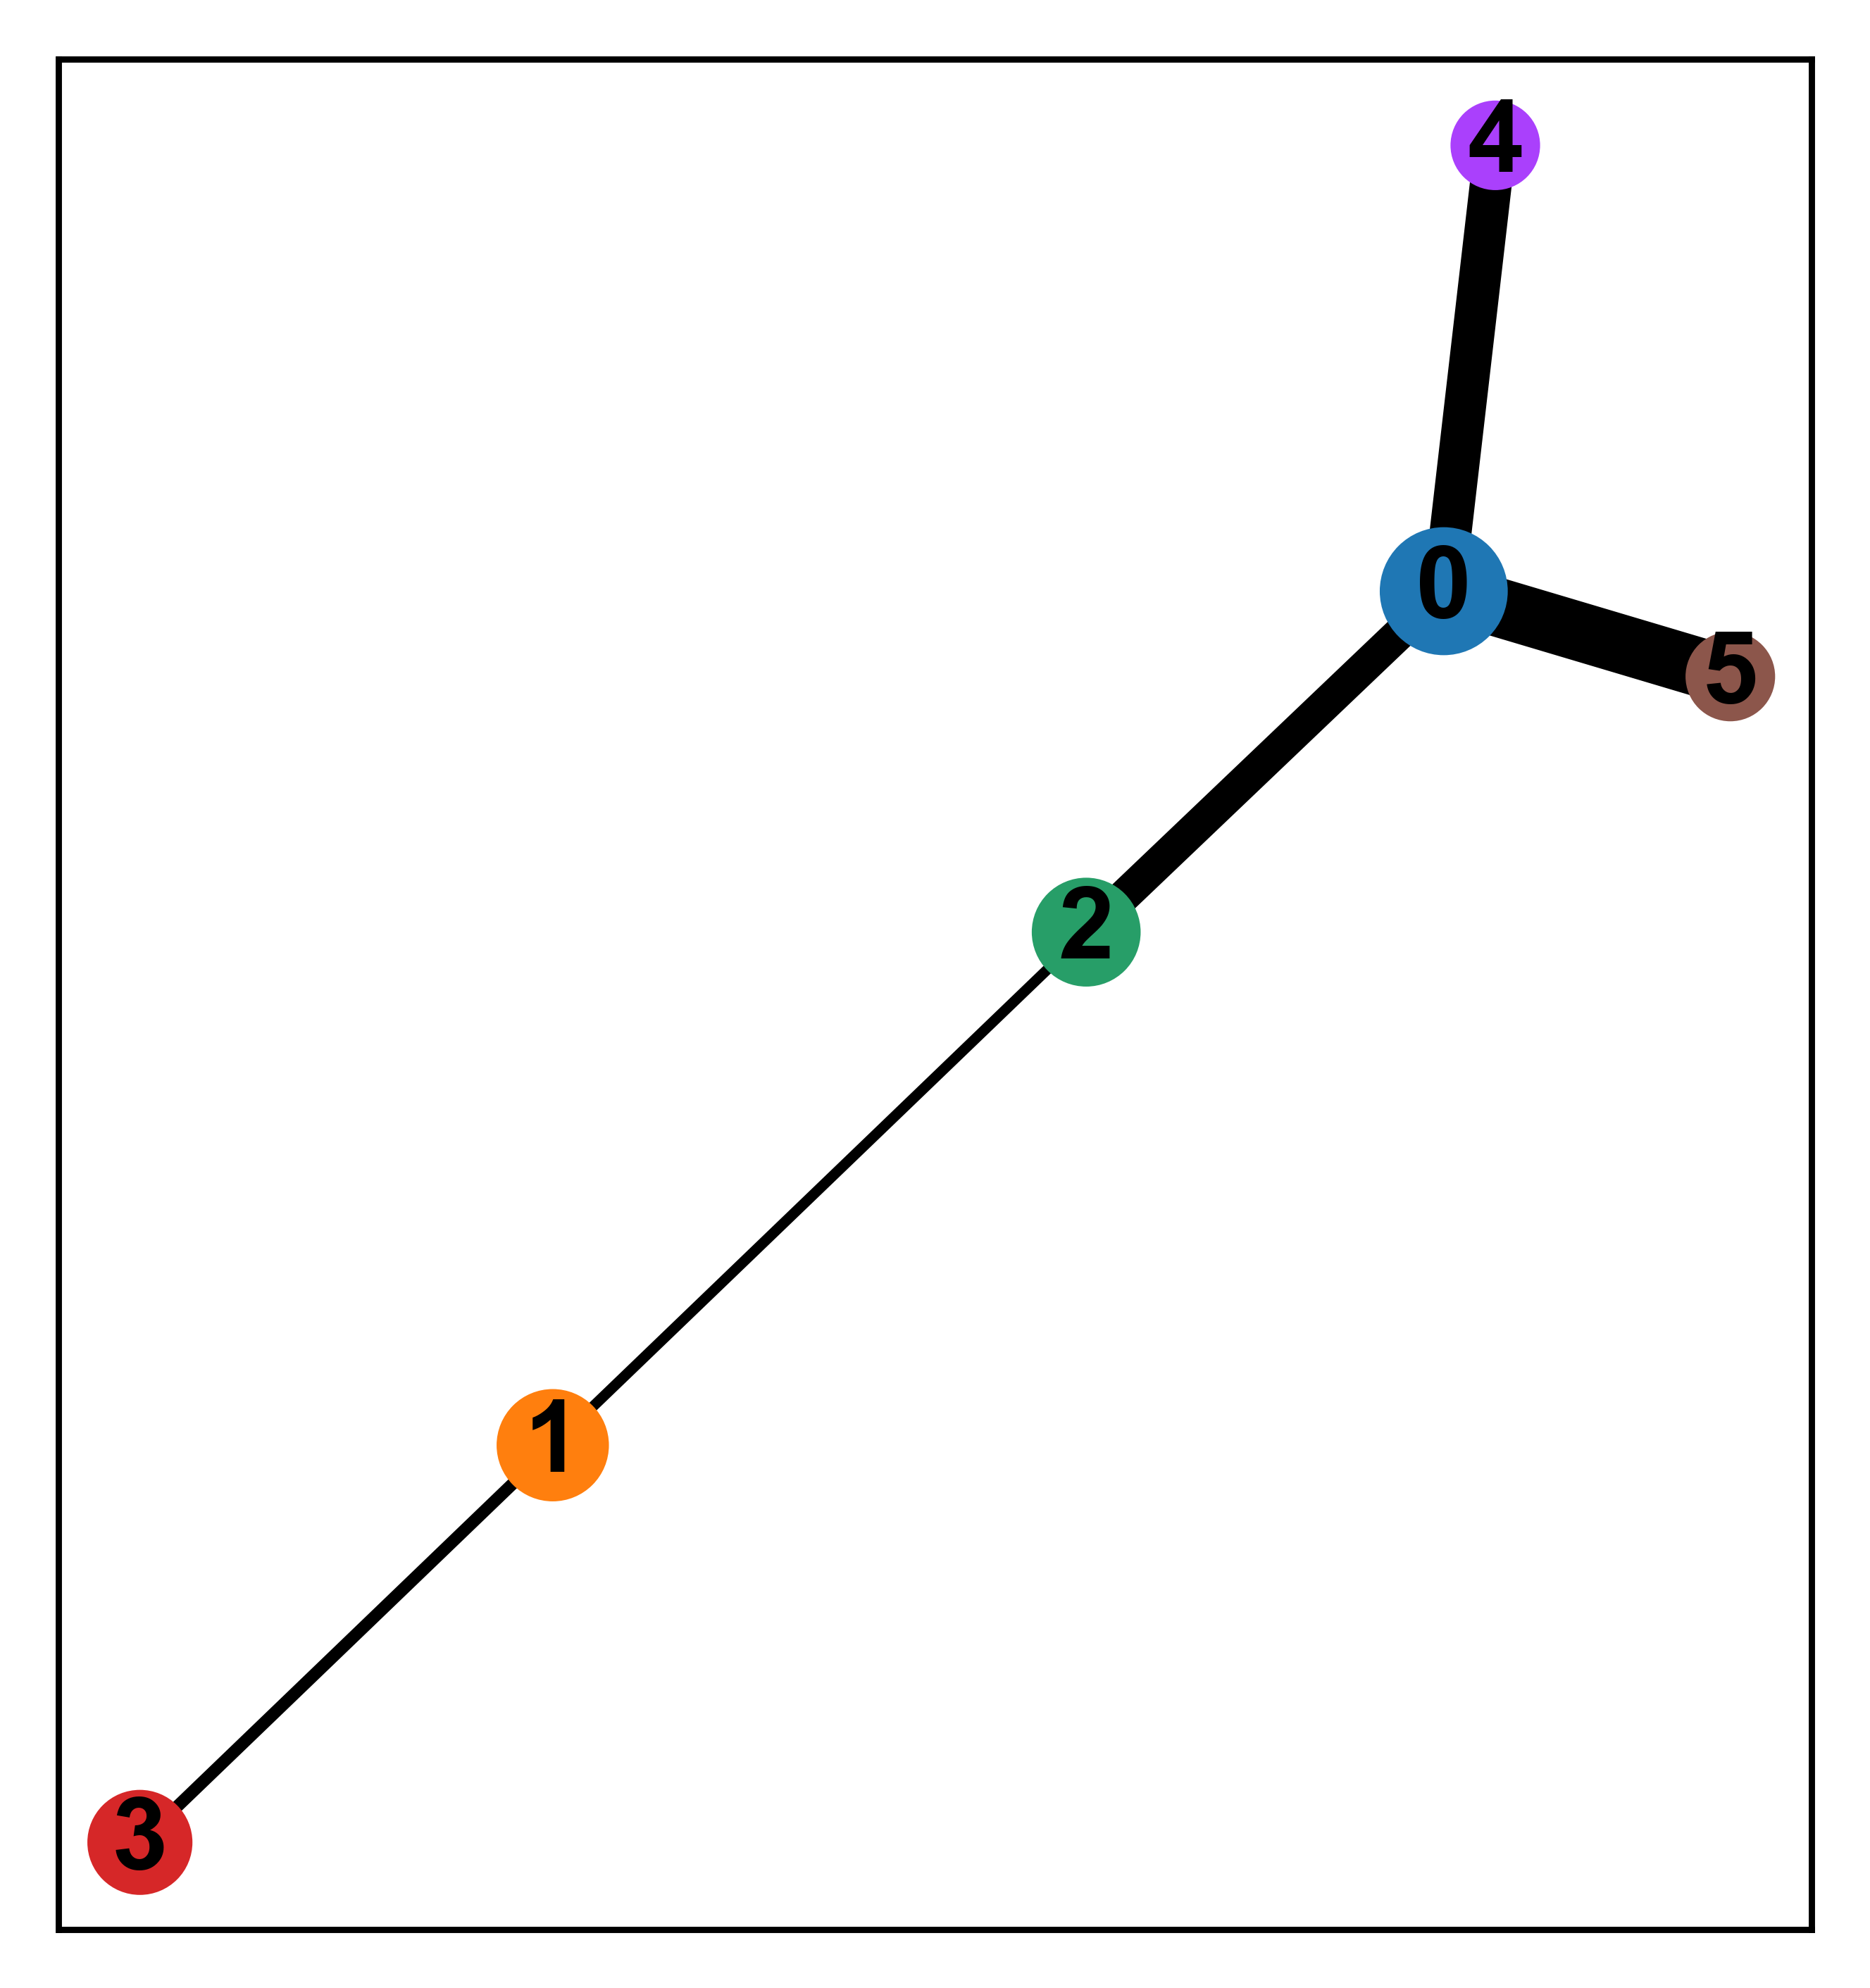

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


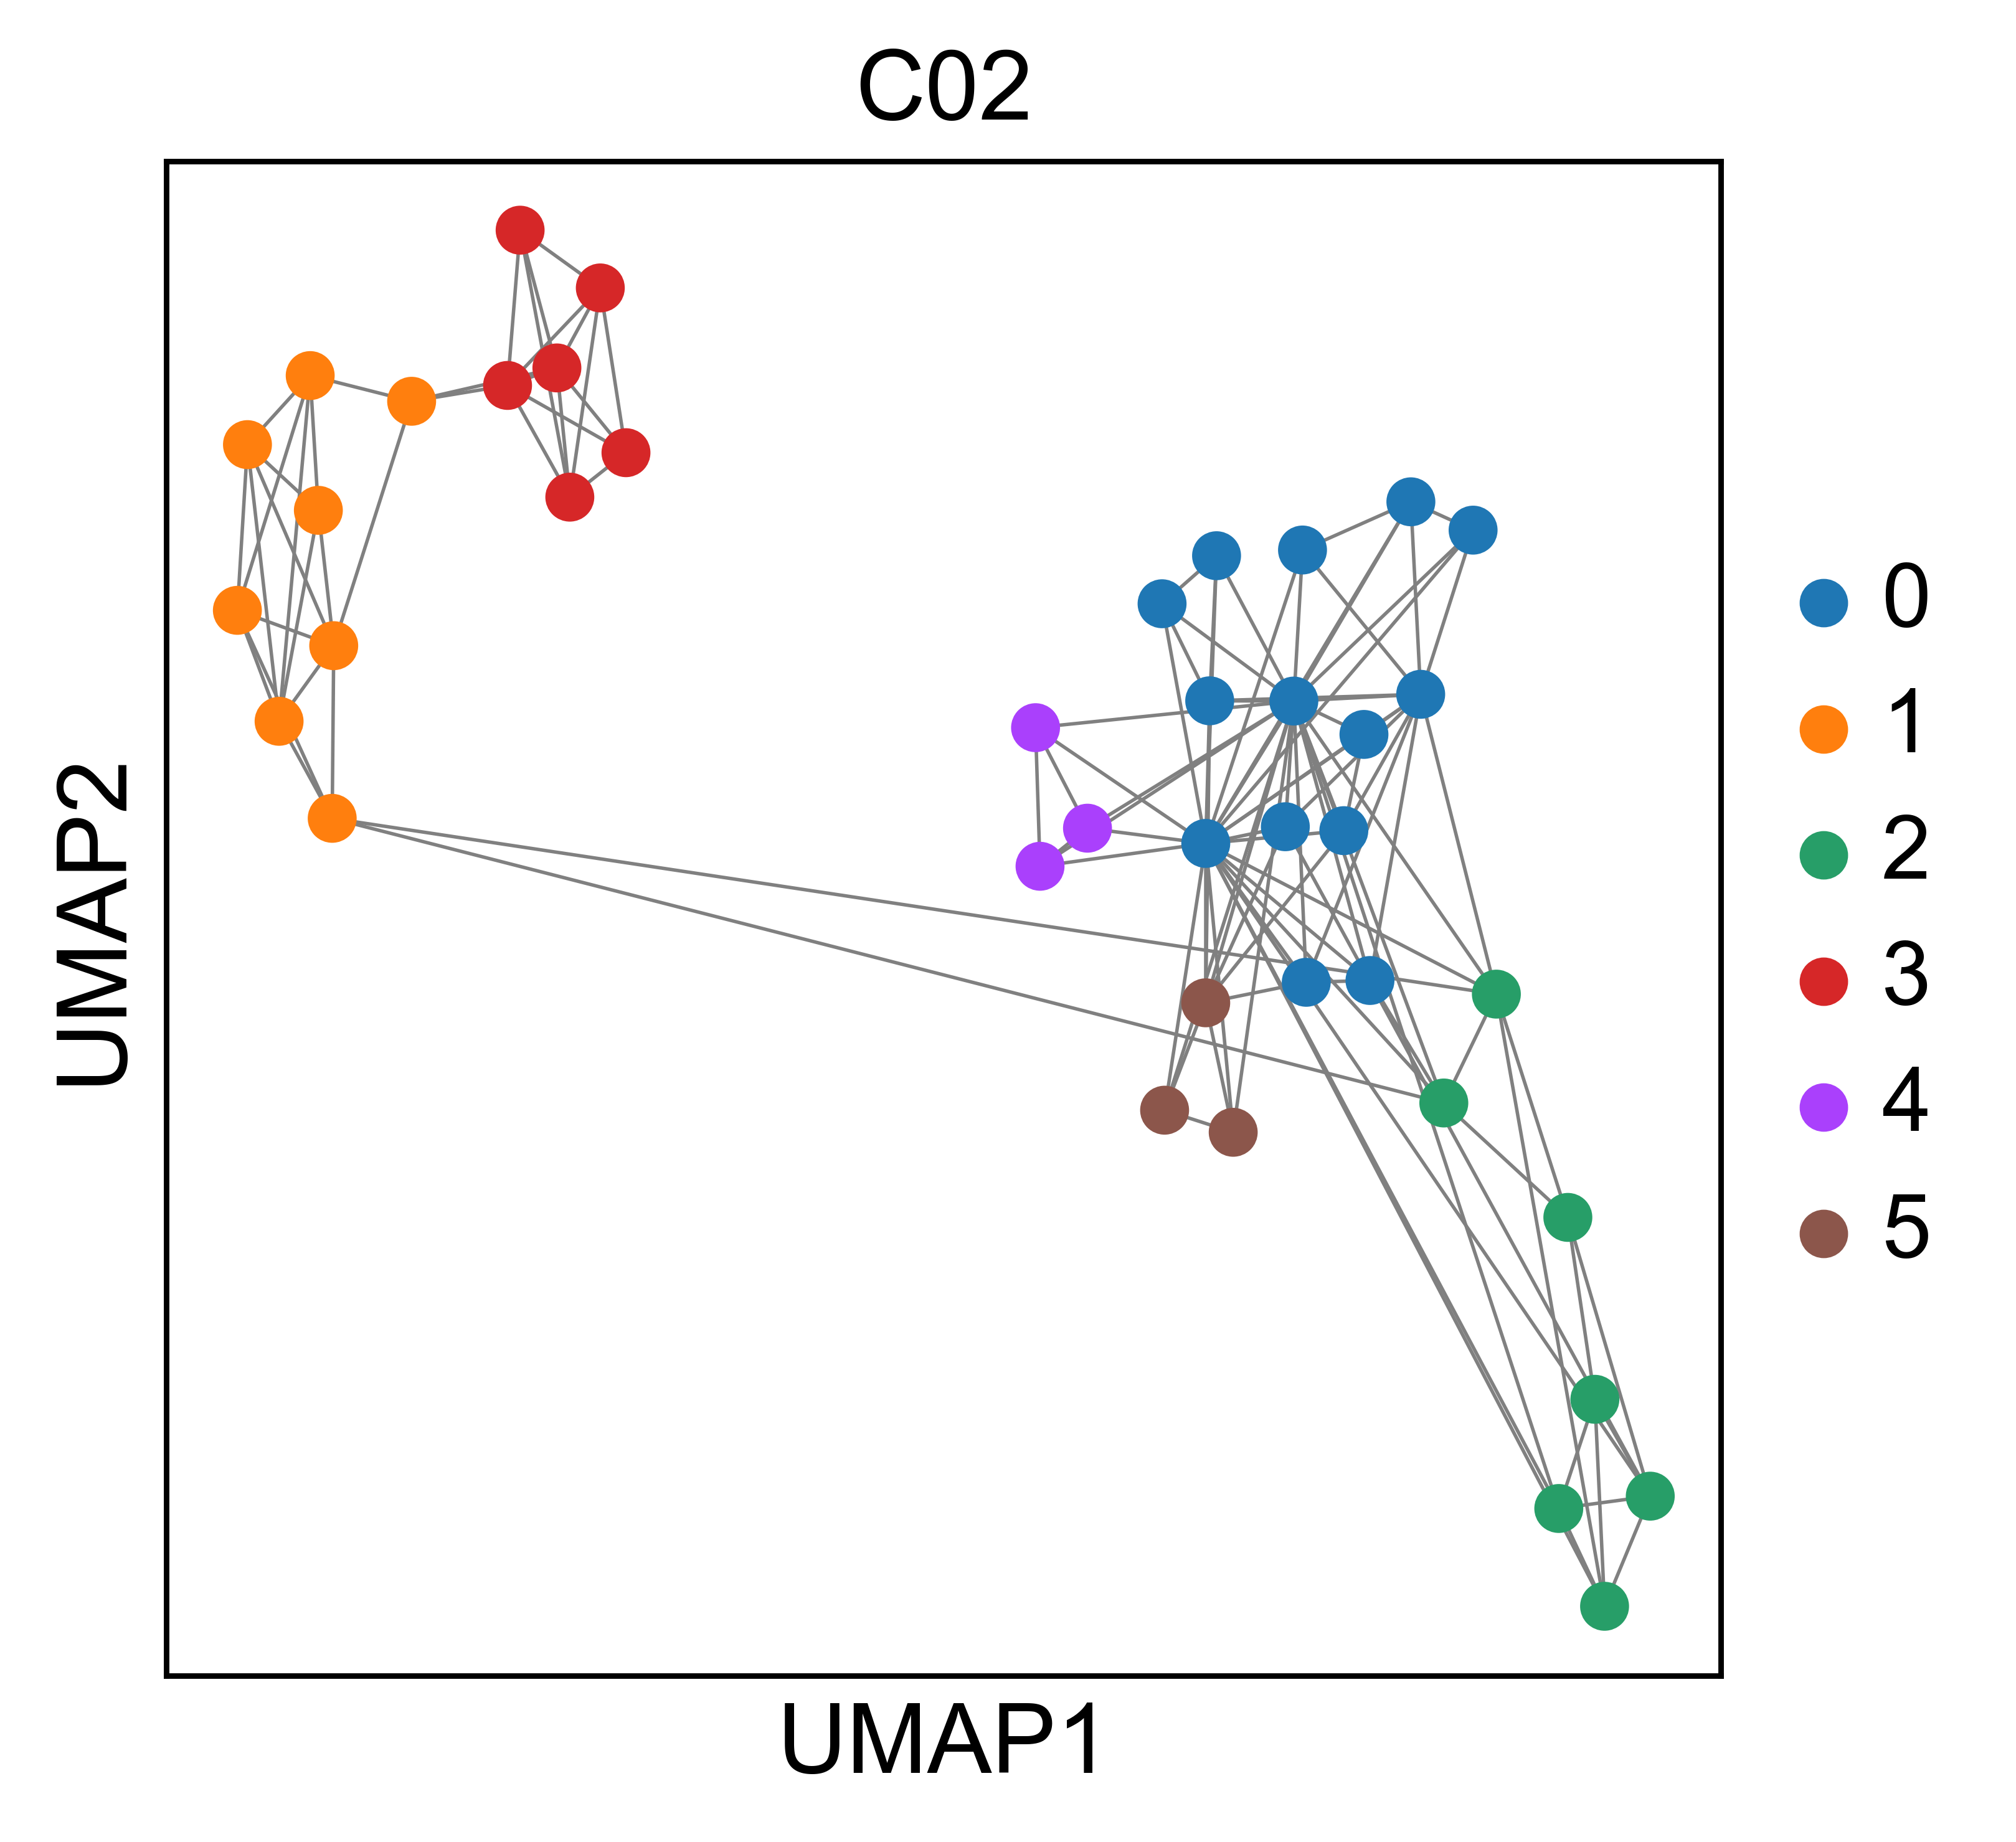

writing '.csv' files to outputC02


C03
AnnData object with n_obs × n_vars = 73 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 73
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 73
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 7 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


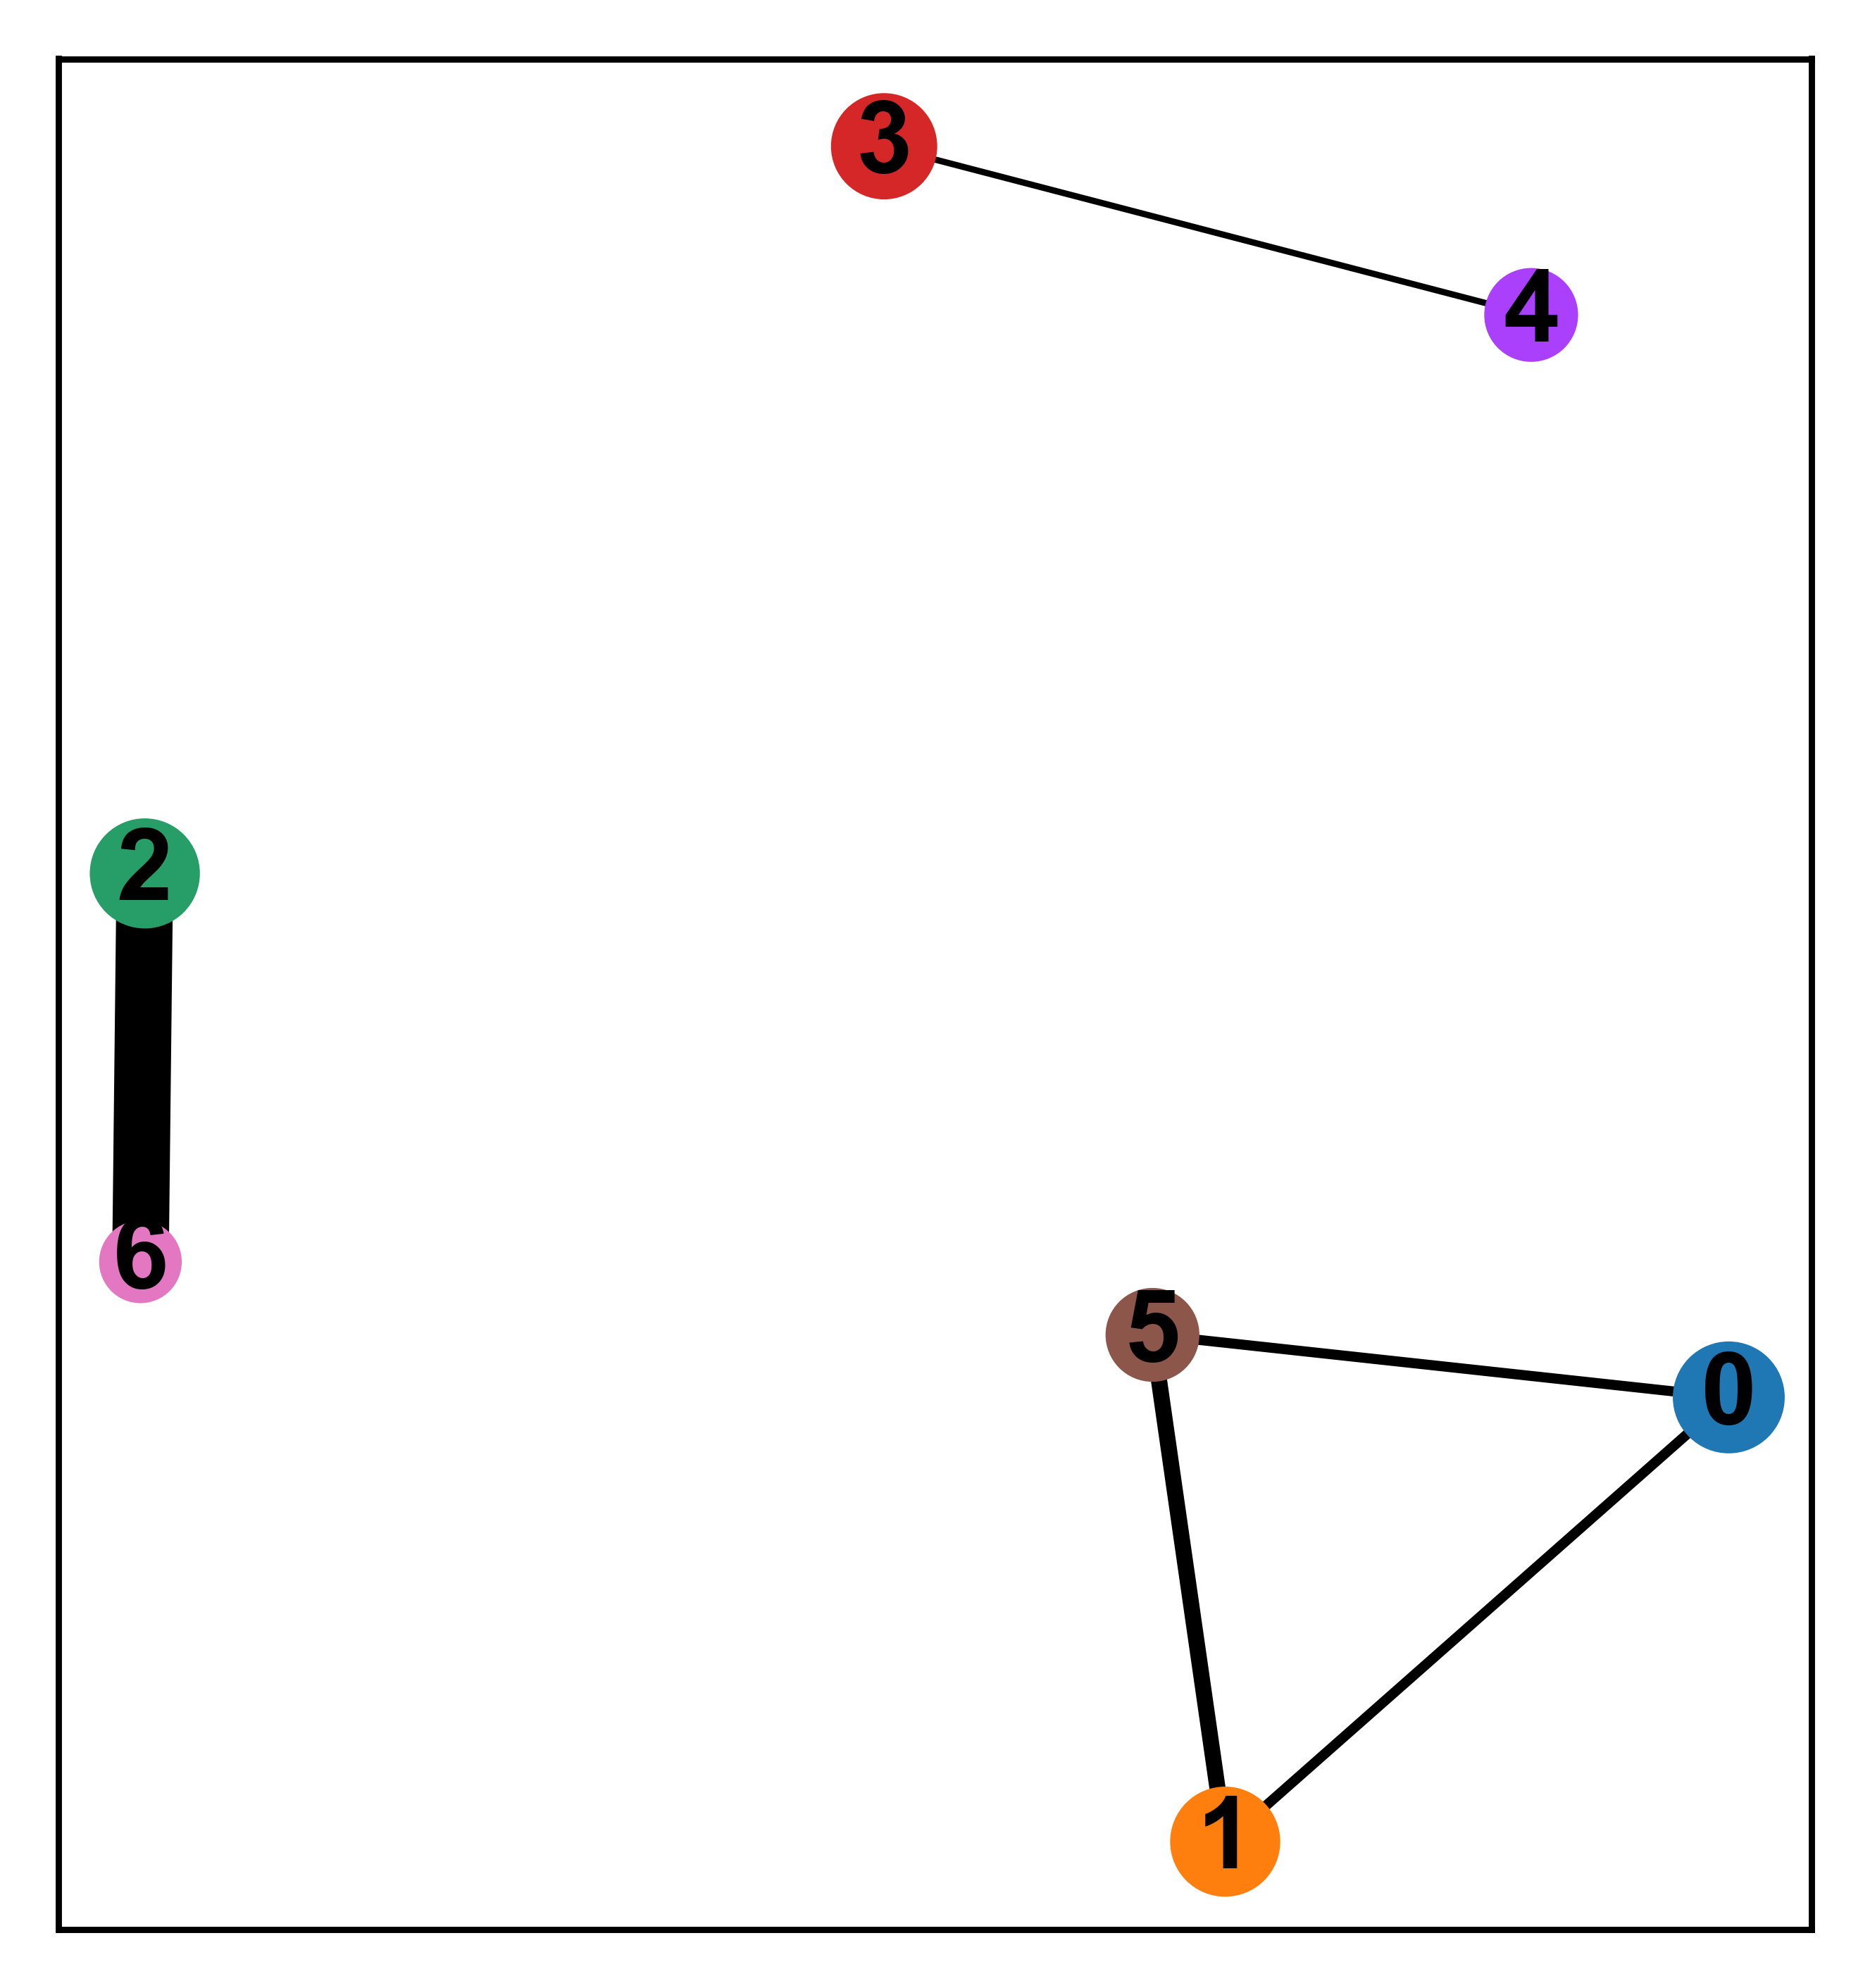

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/Users/alexgraudenzi/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


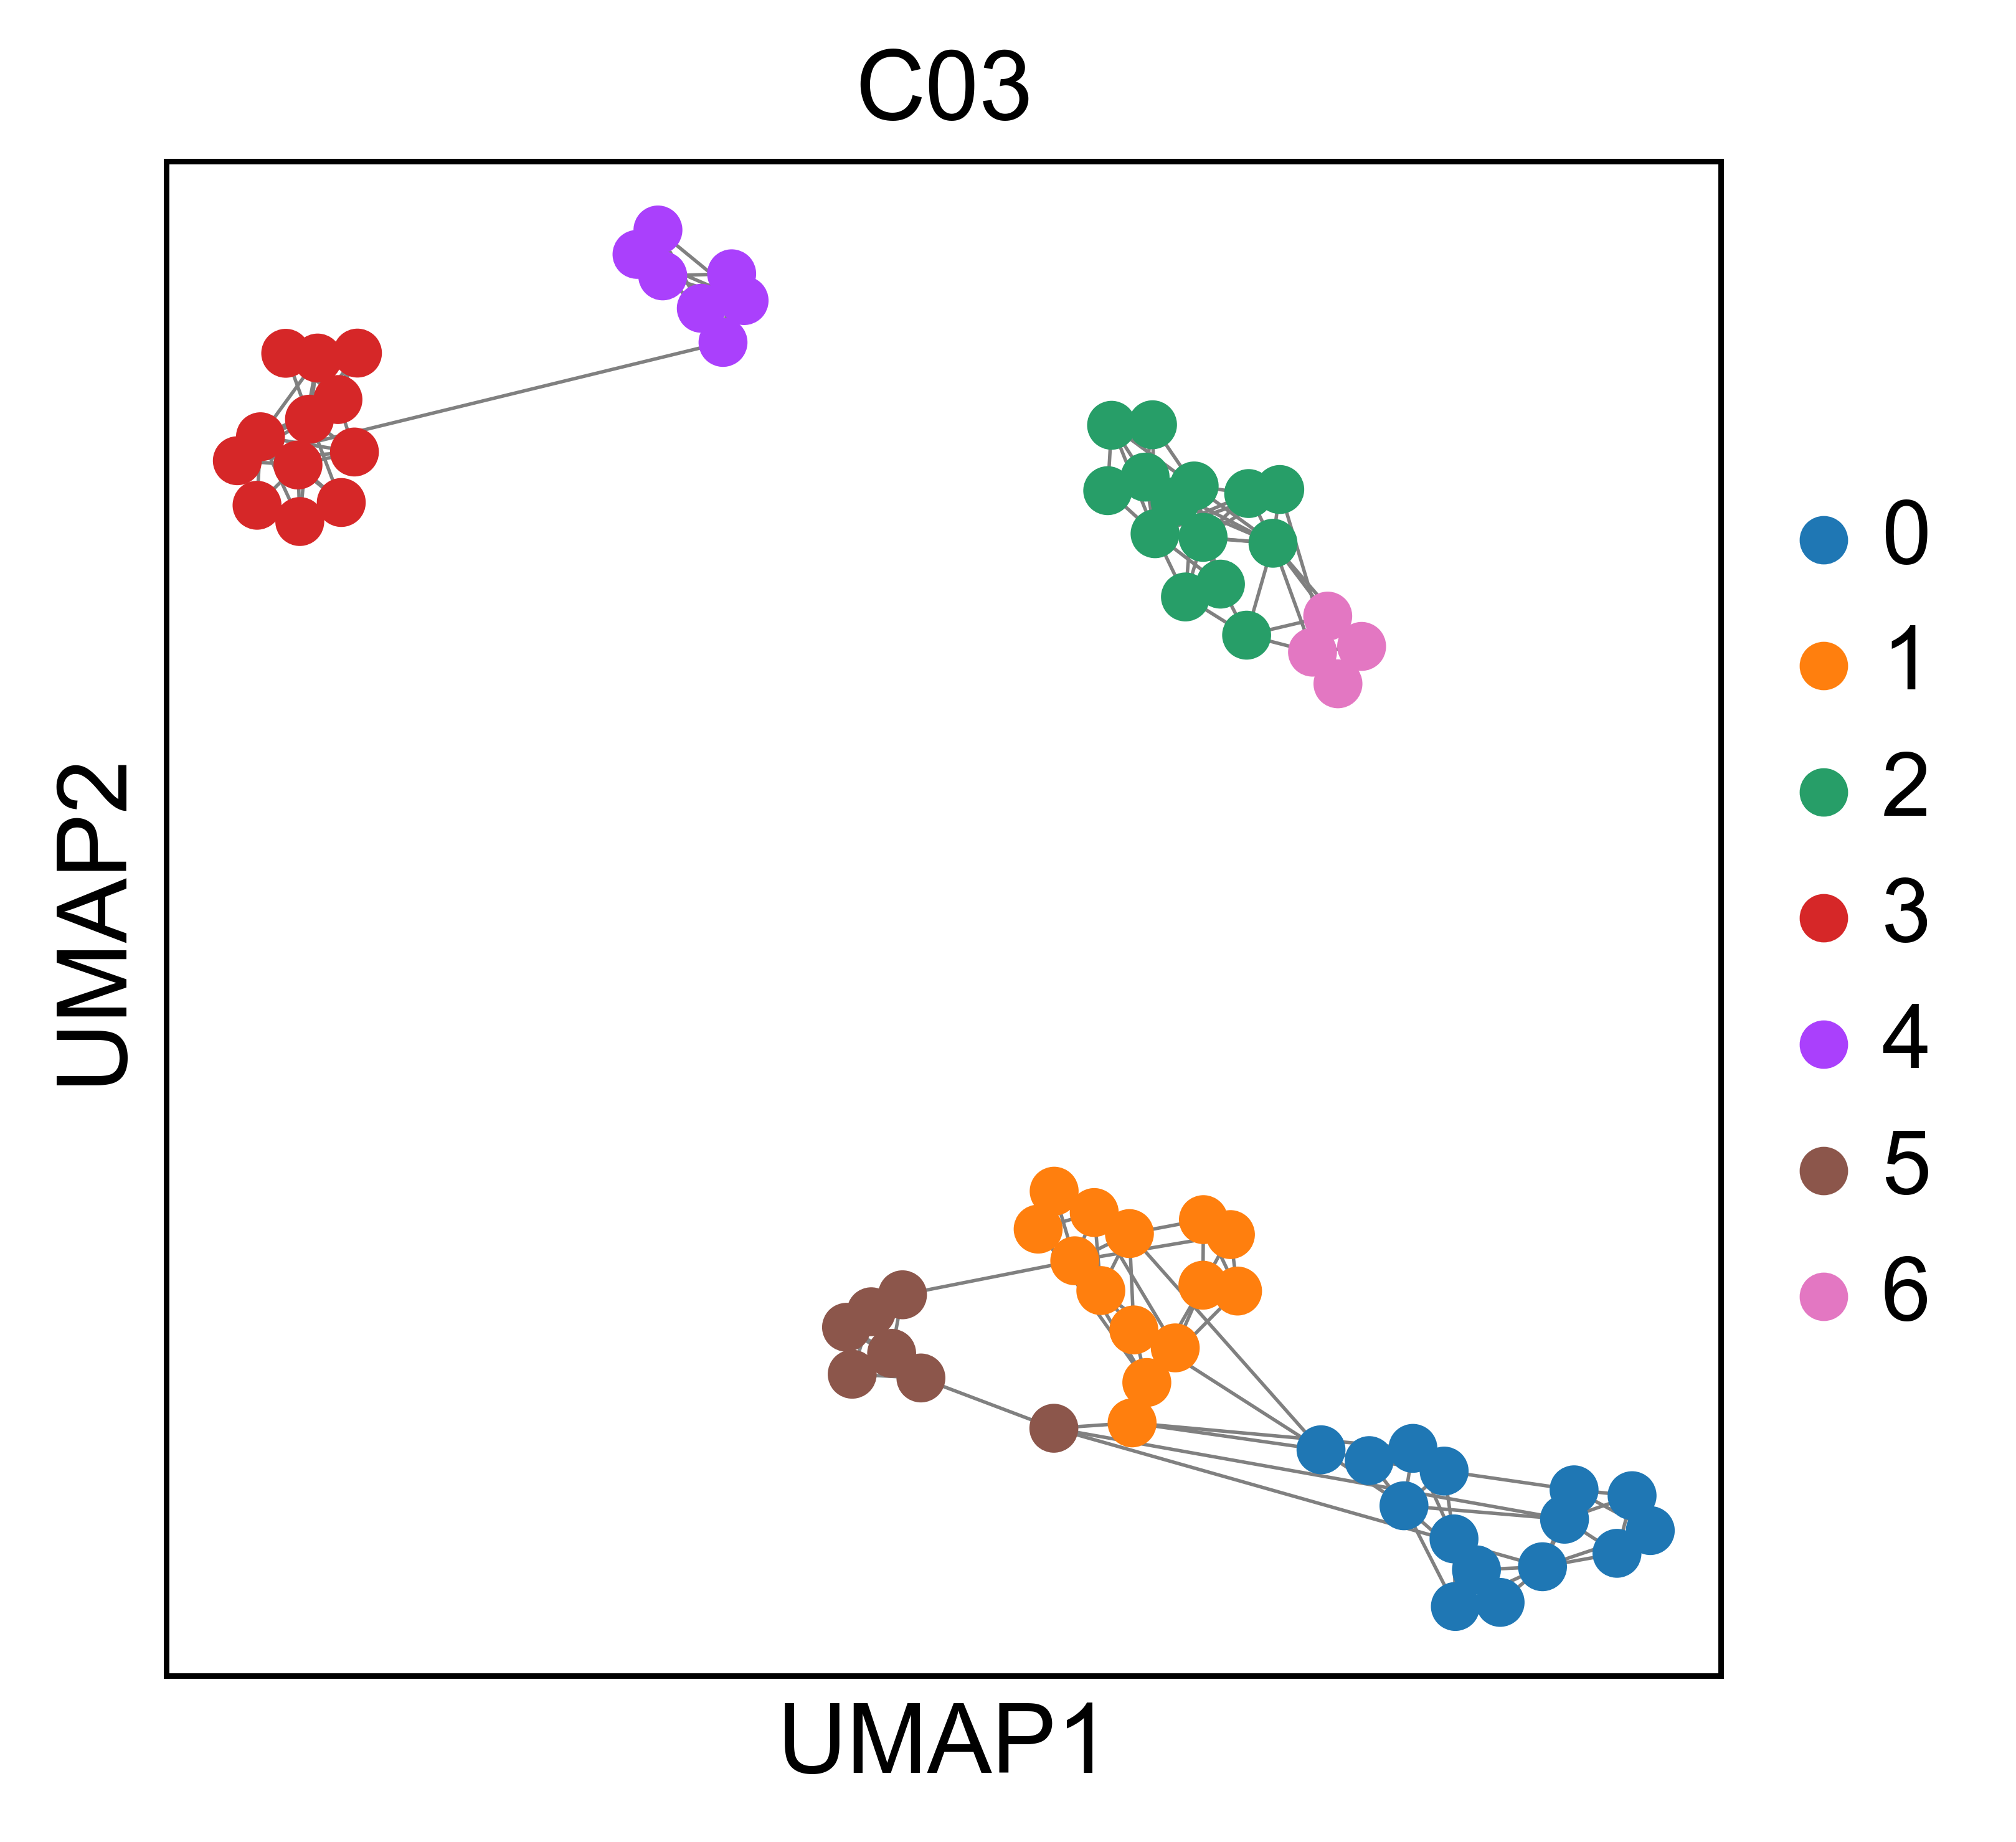

writing '.csv' files to outputC03


C04
AnnData object with n_obs × n_vars = 30 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 30
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


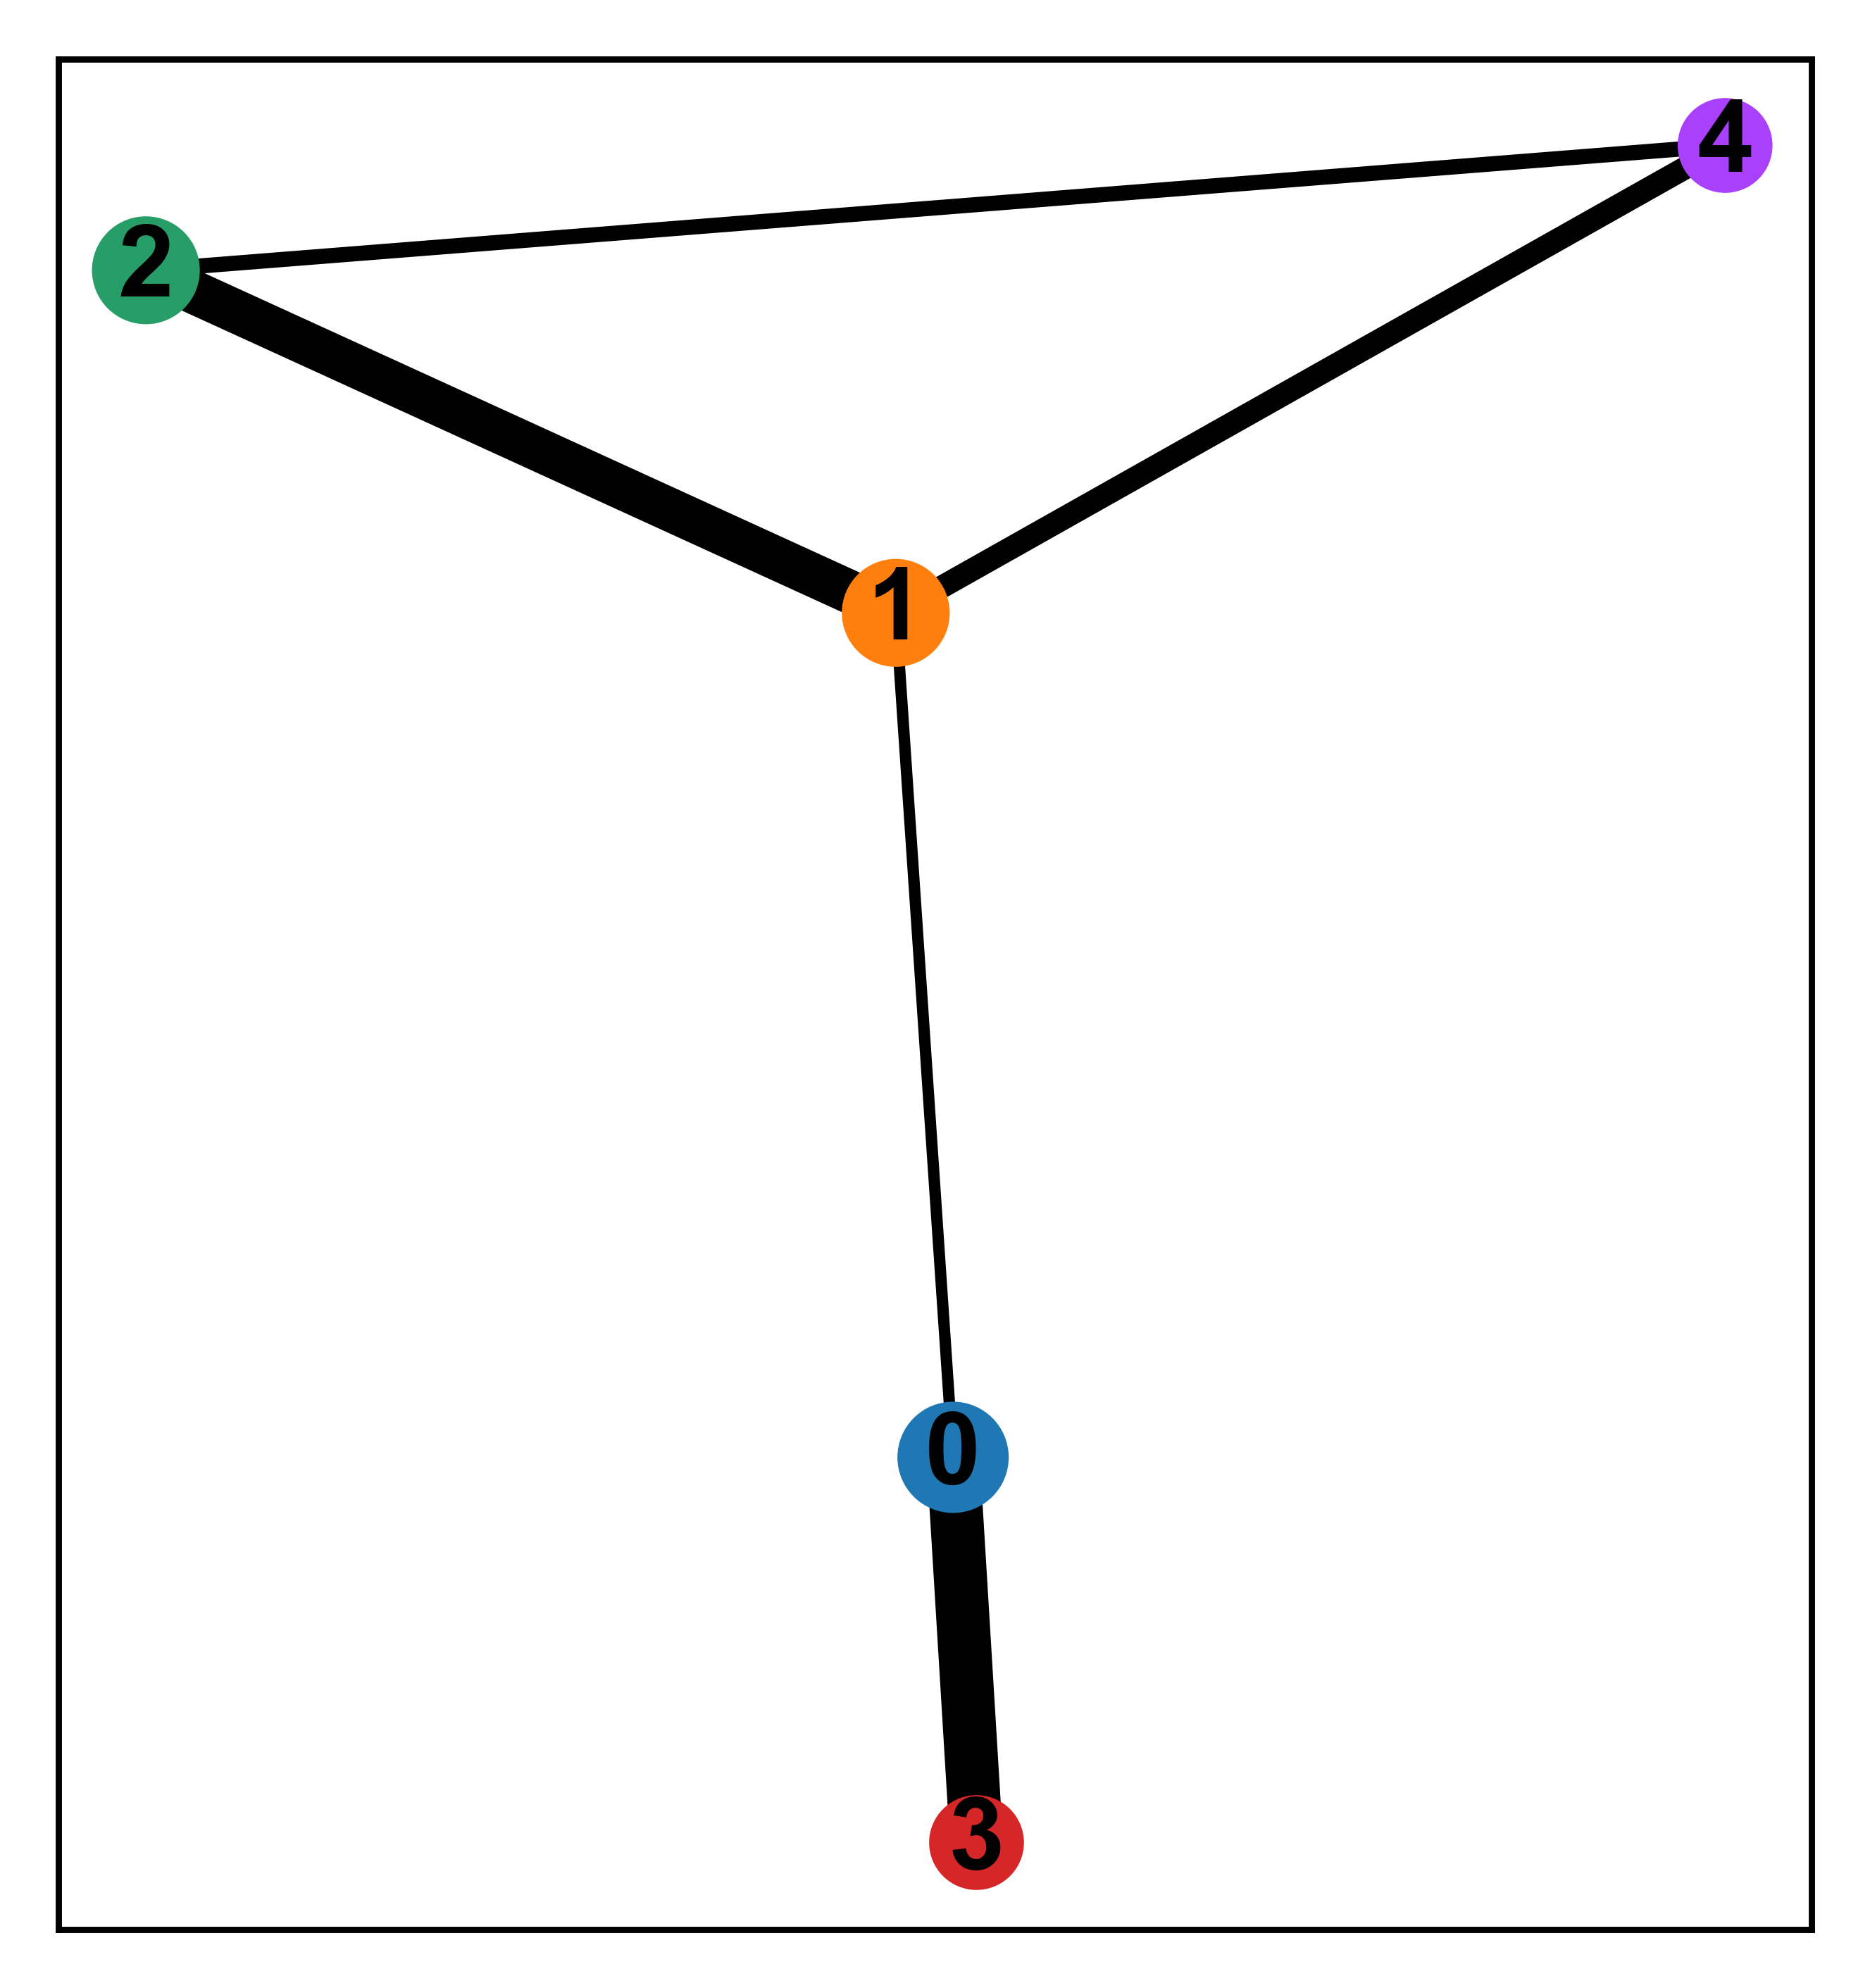

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


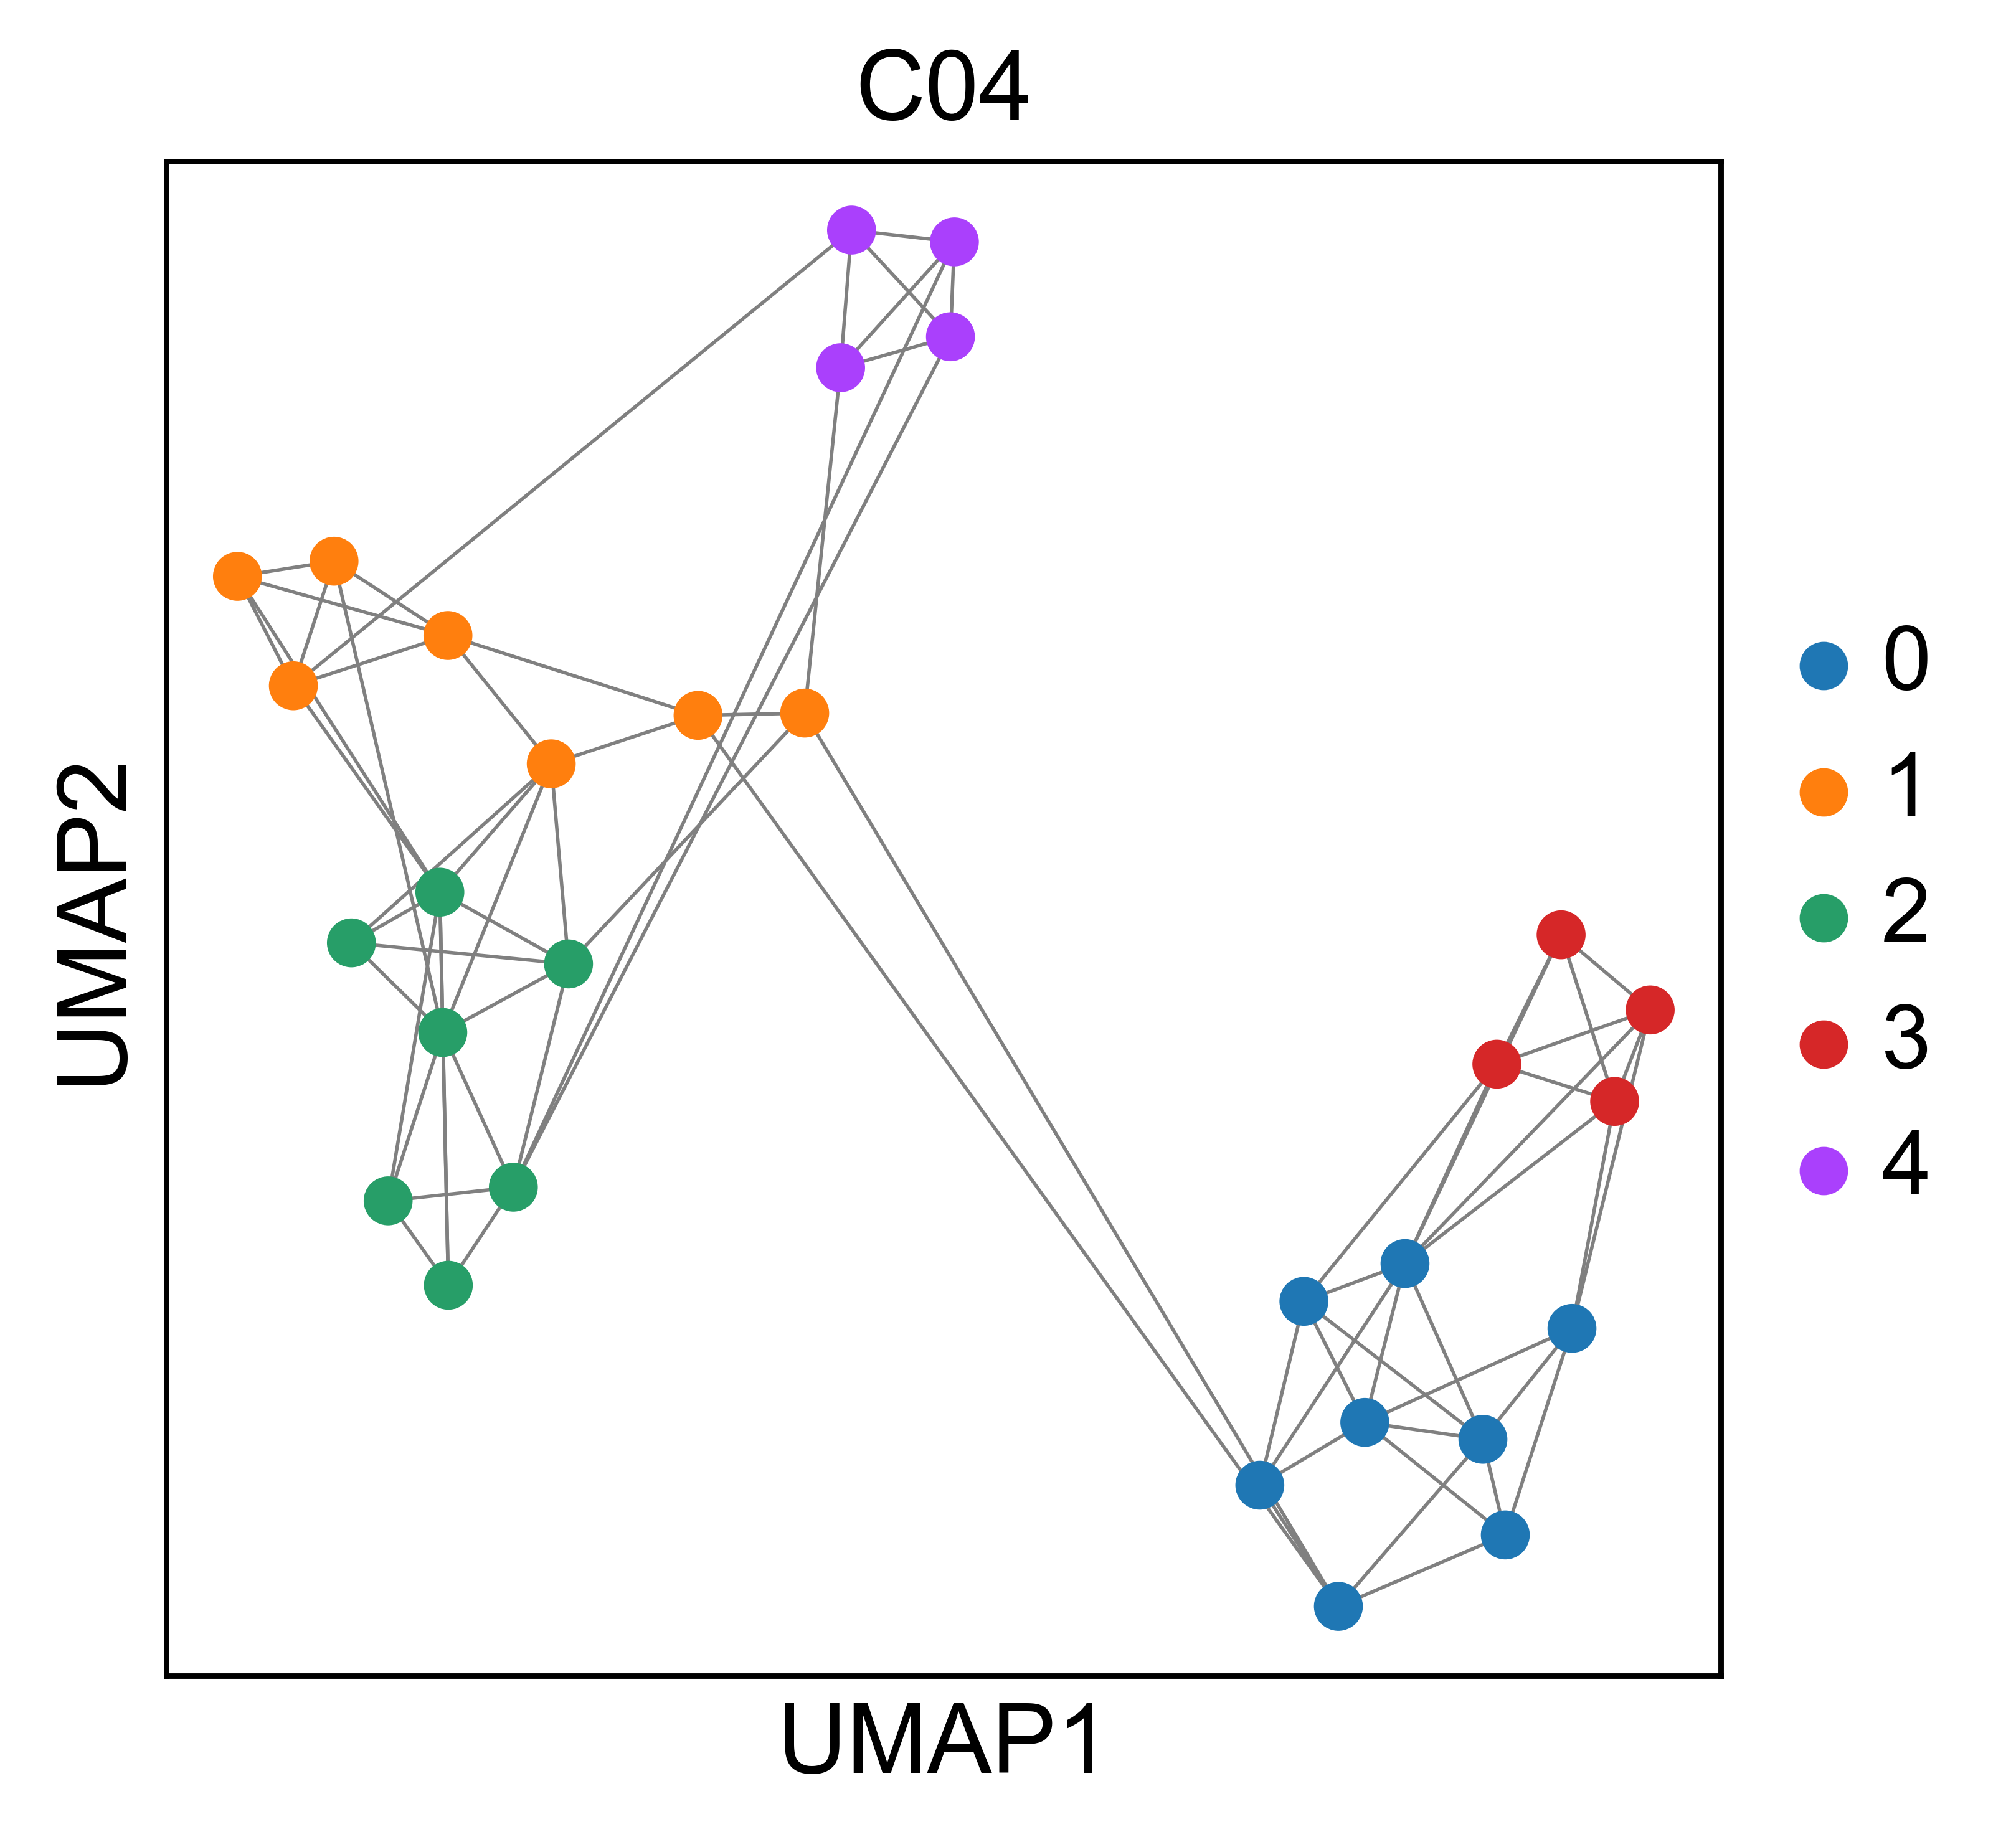

writing '.csv' files to outputC04


C05
AnnData object with n_obs × n_vars = 33 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 33
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 33
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


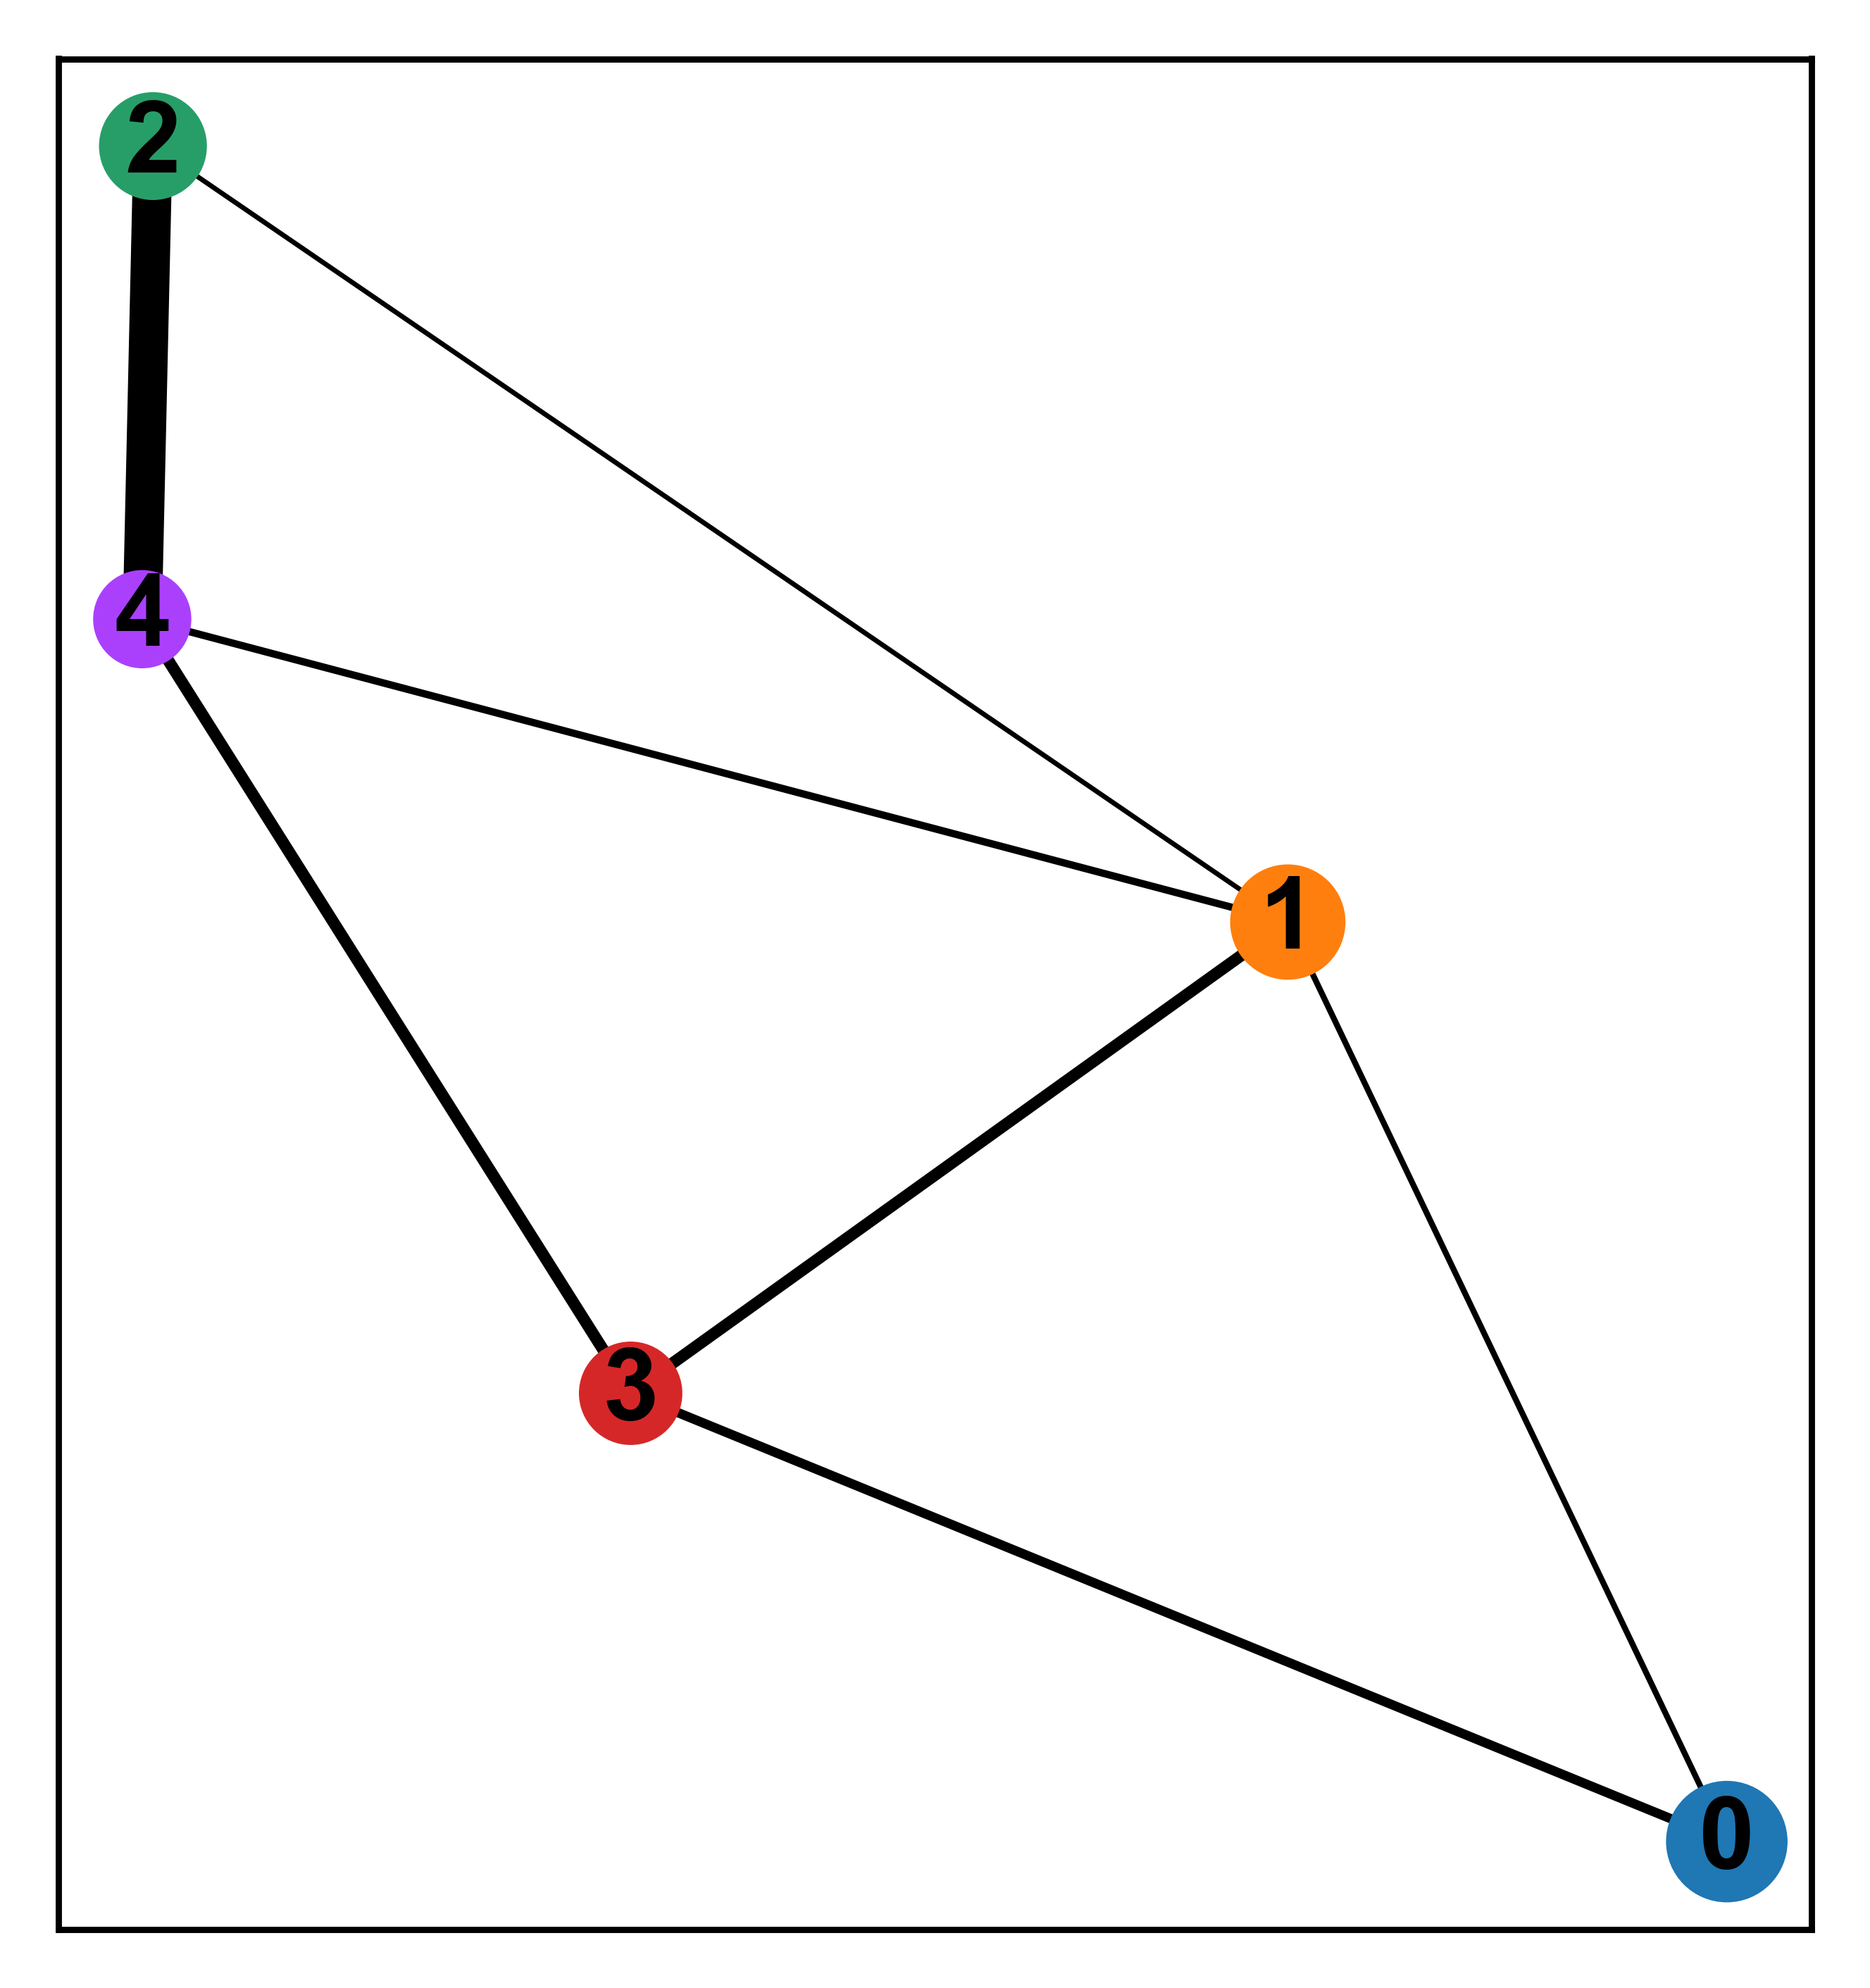

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


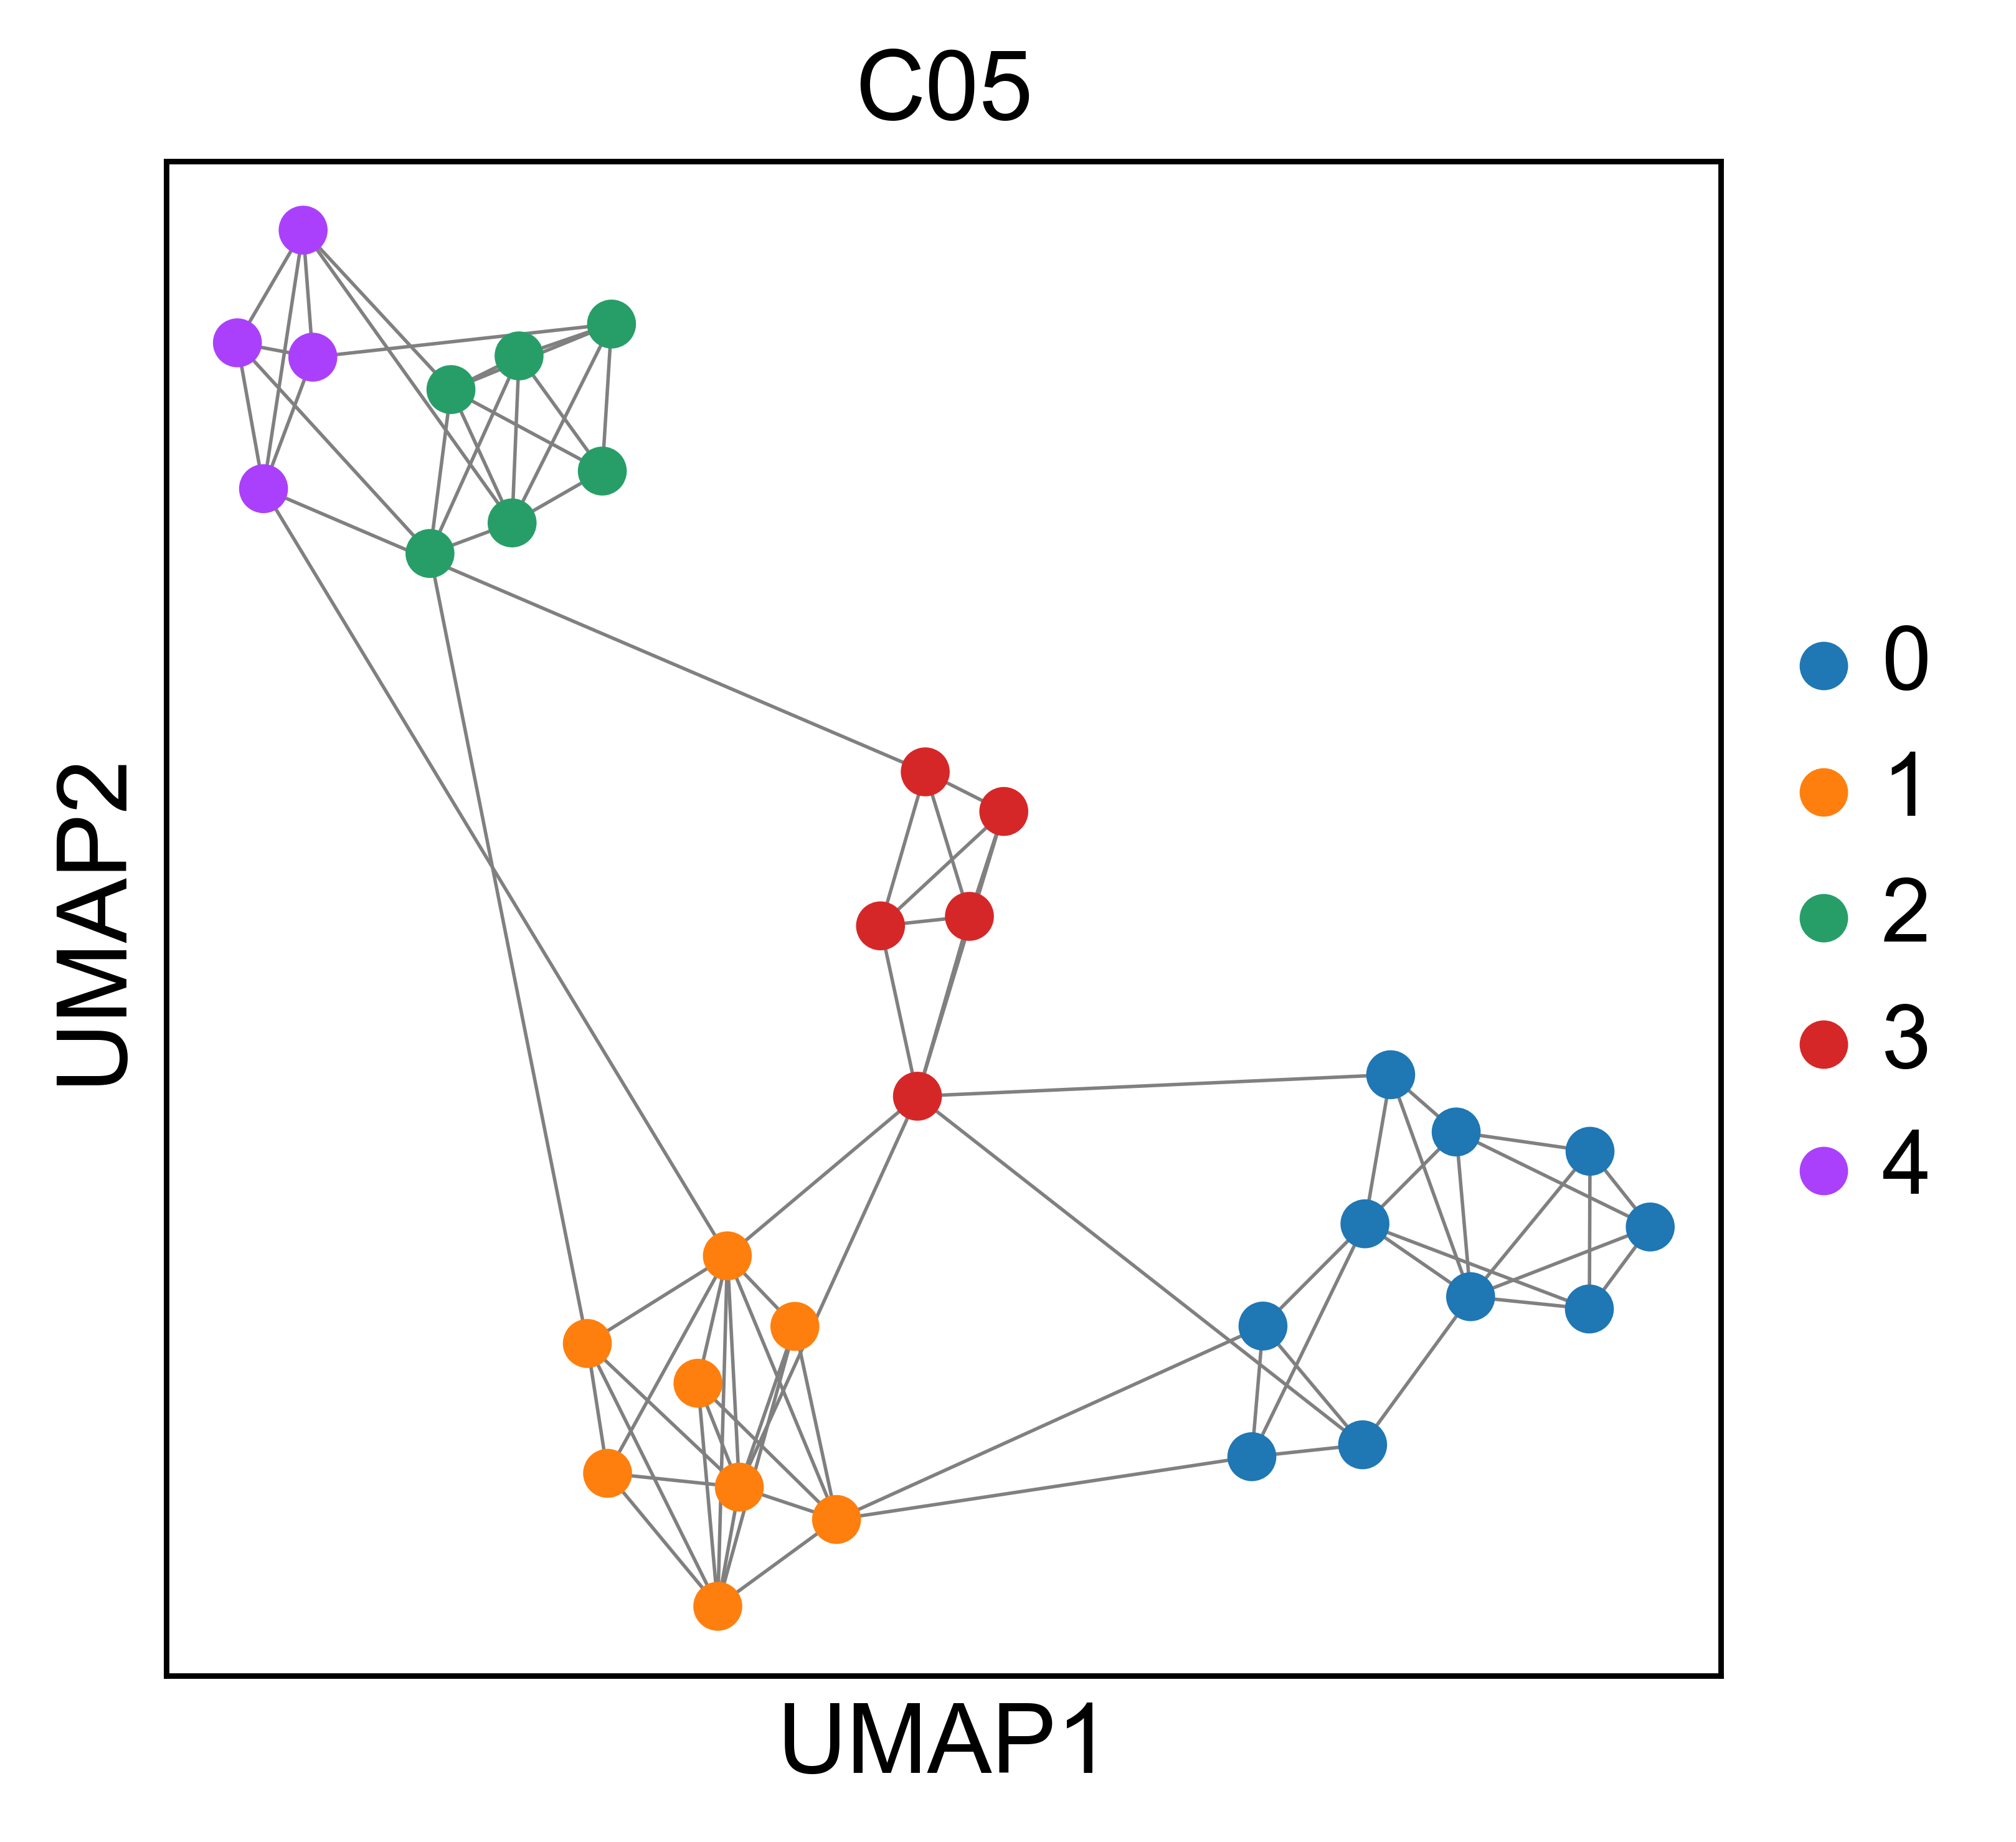

writing '.csv' files to outputC05


C06
AnnData object with n_obs × n_vars = 89 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 89
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 89
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


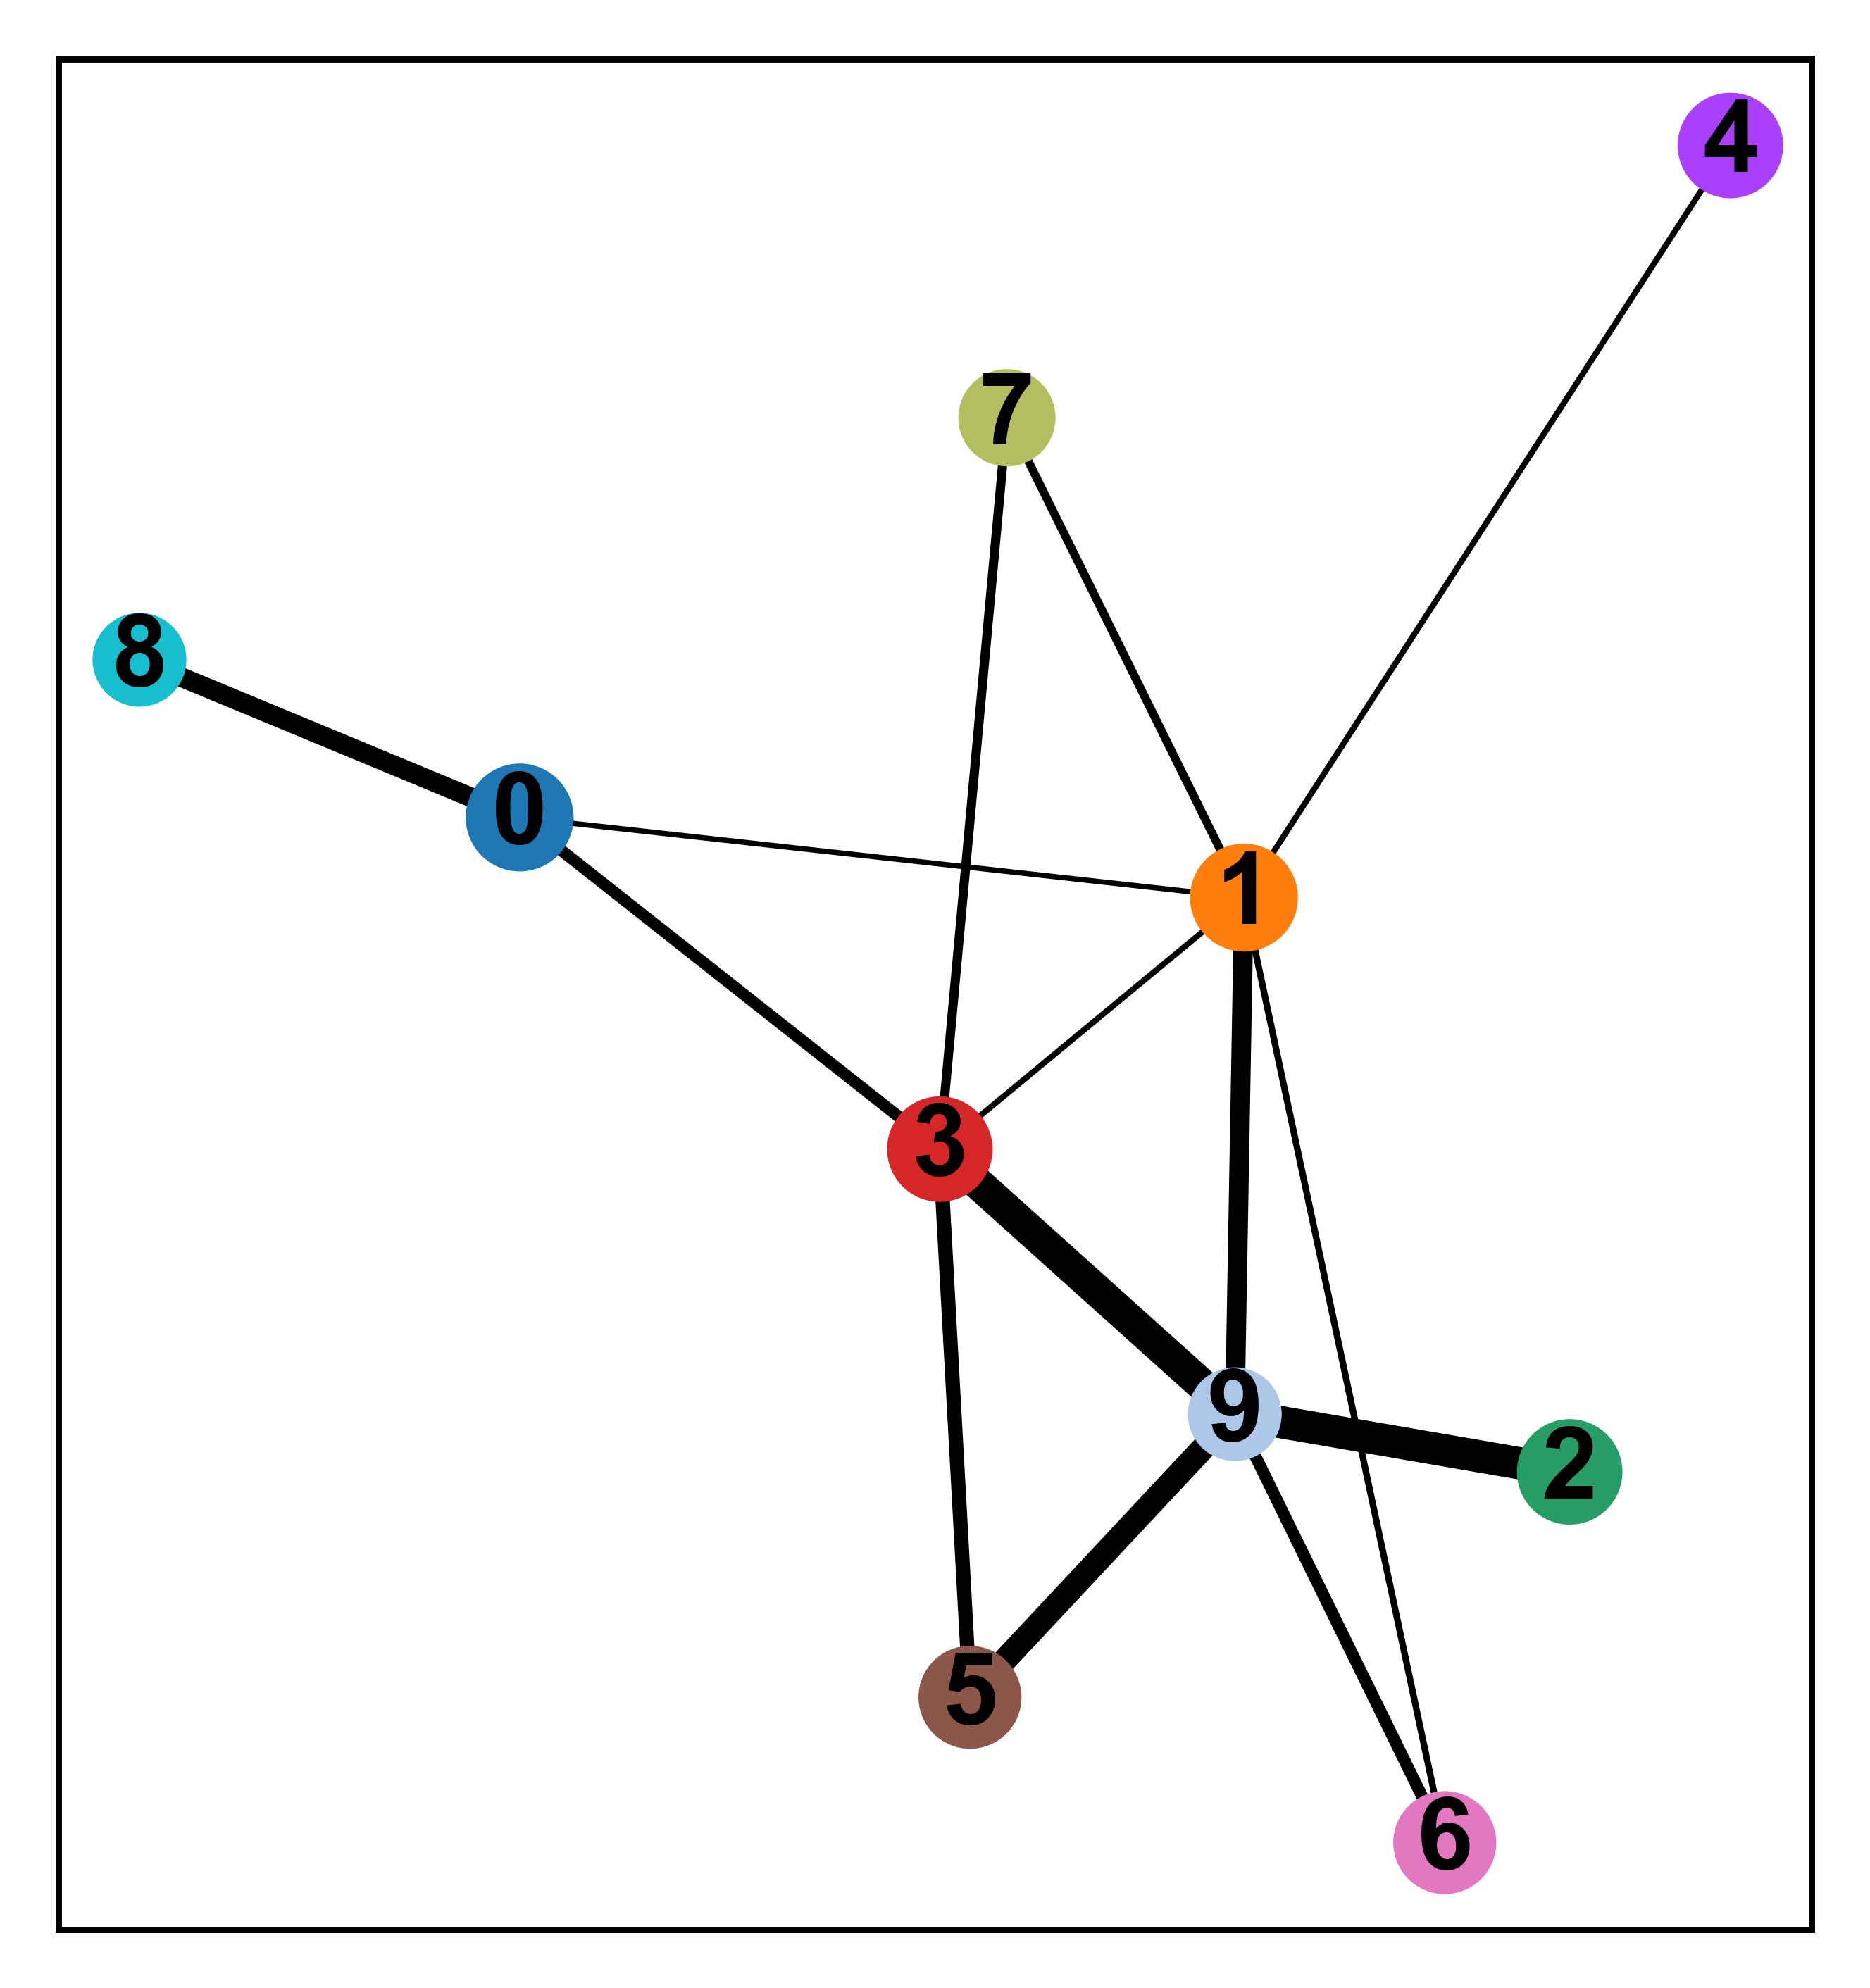

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


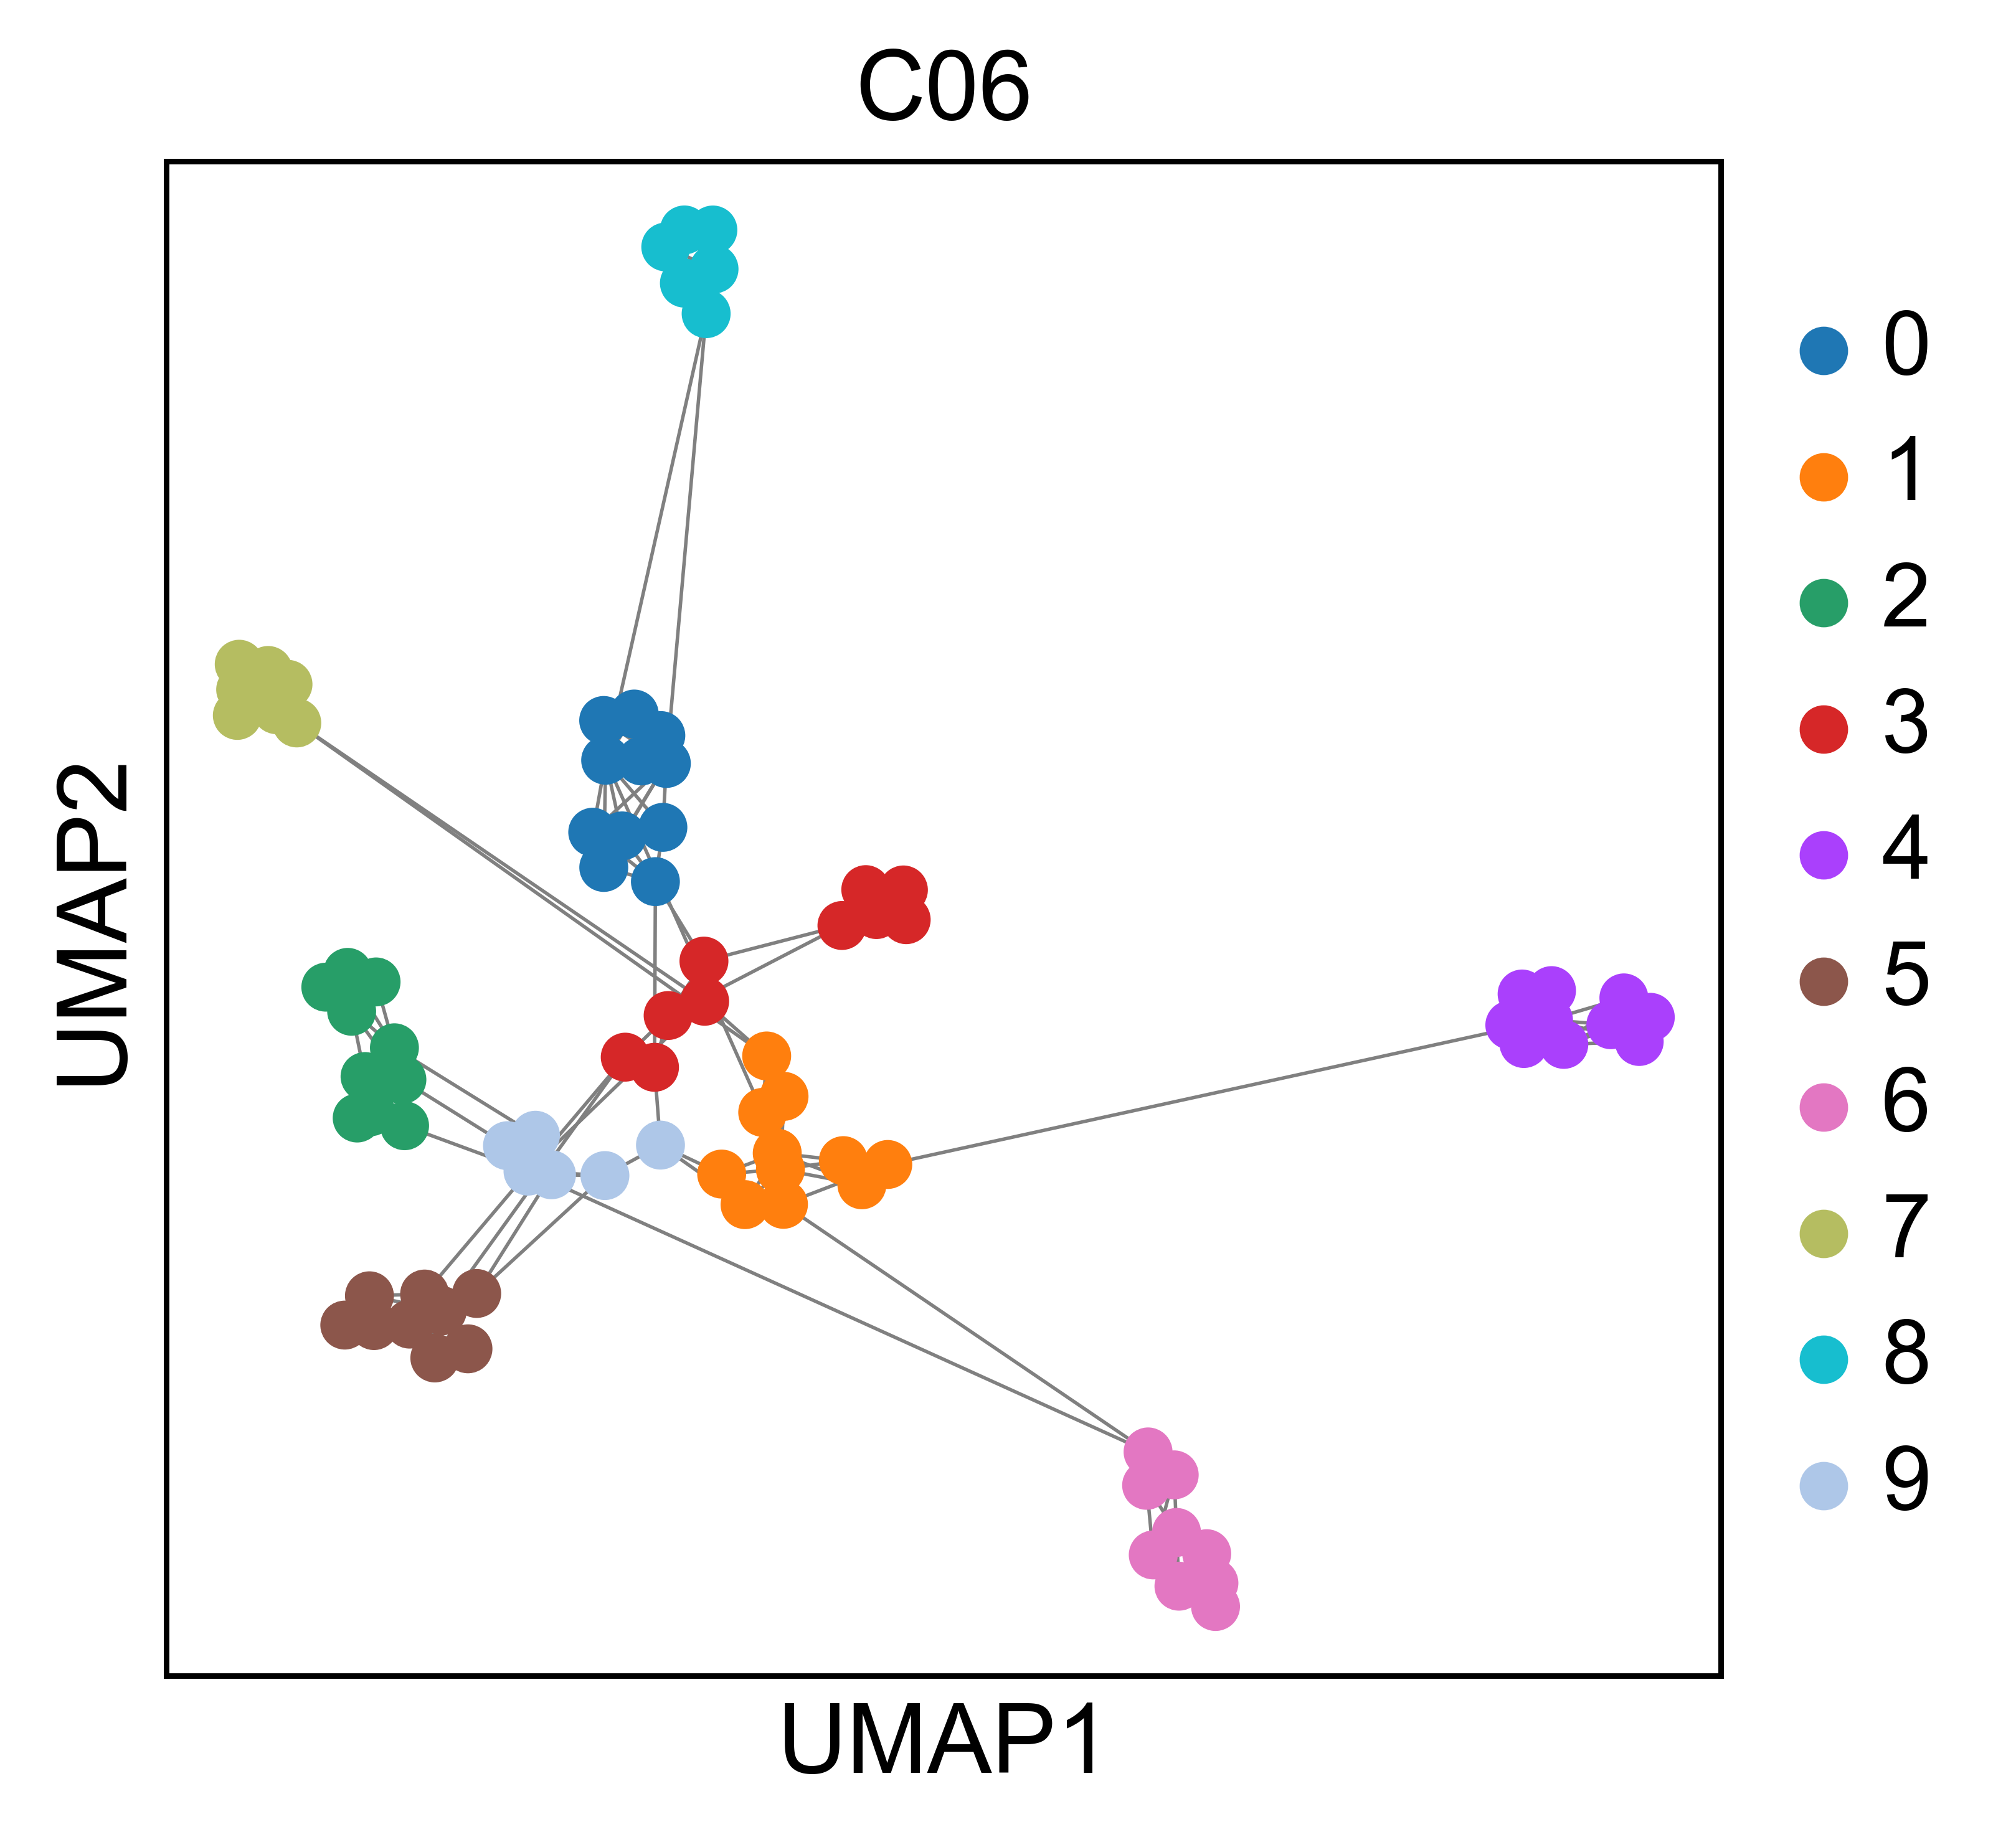

writing '.csv' files to outputC06


C07
AnnData object with n_obs × n_vars = 16 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 16
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 16
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


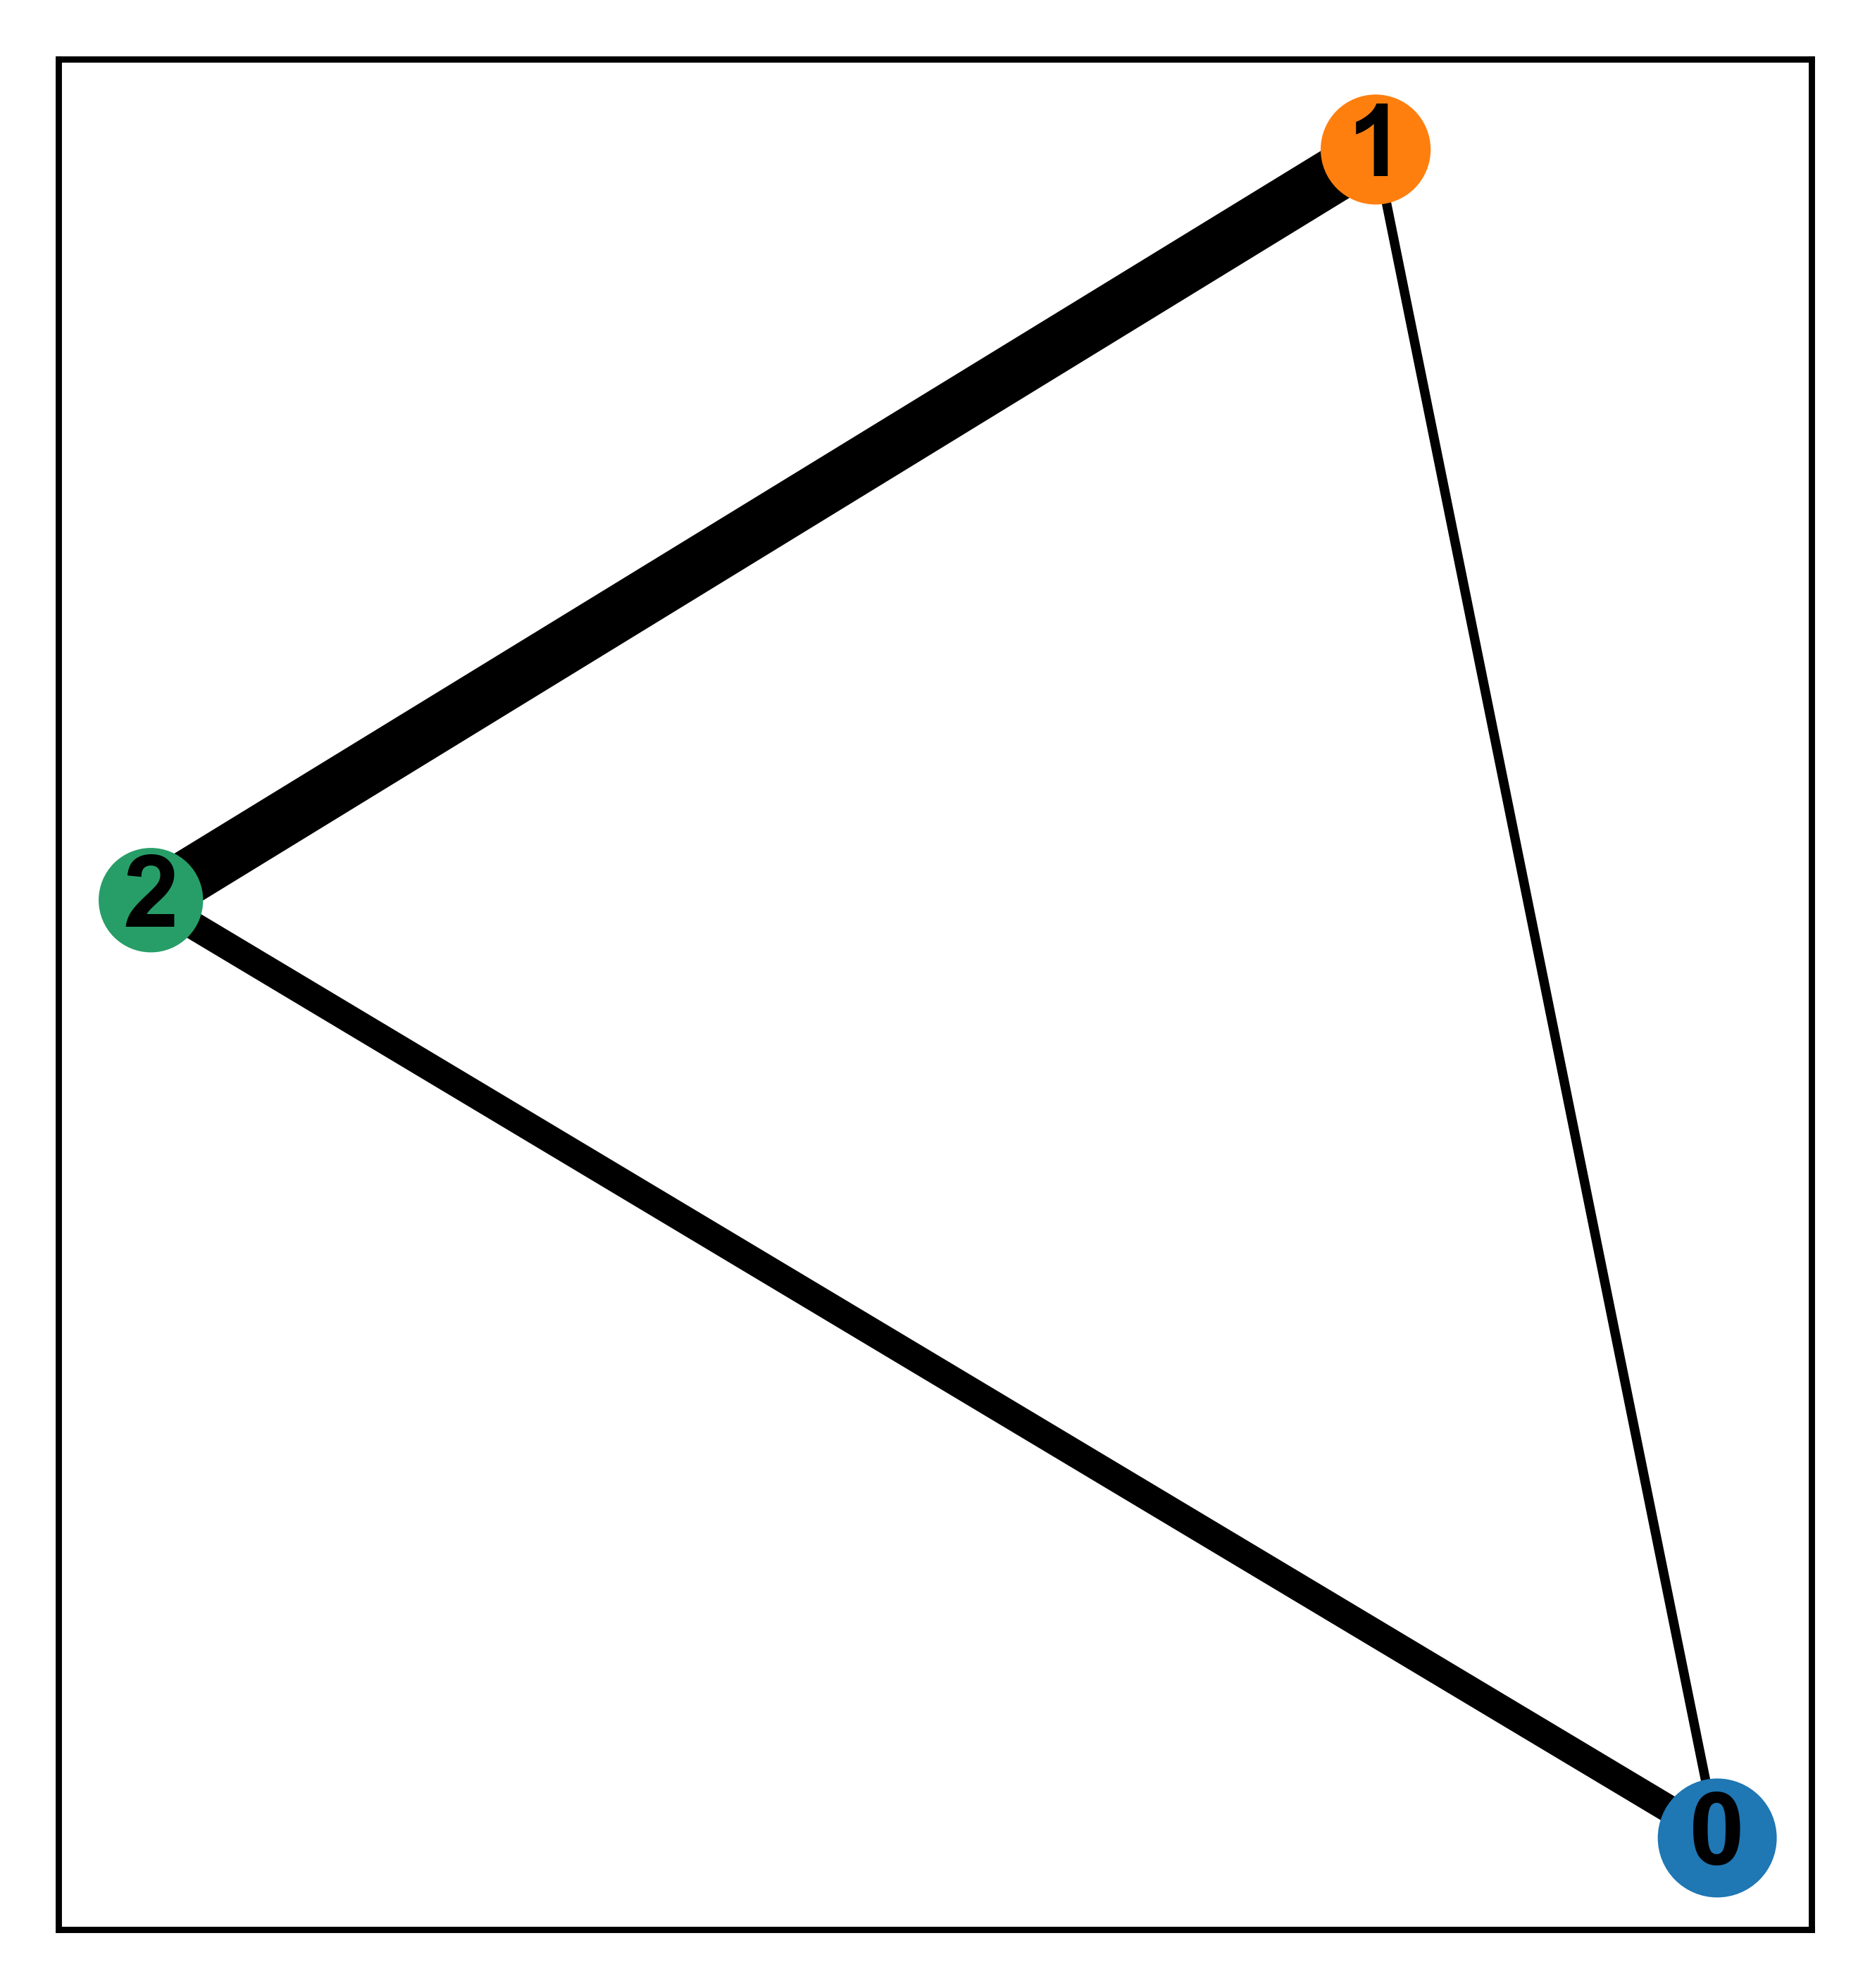

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


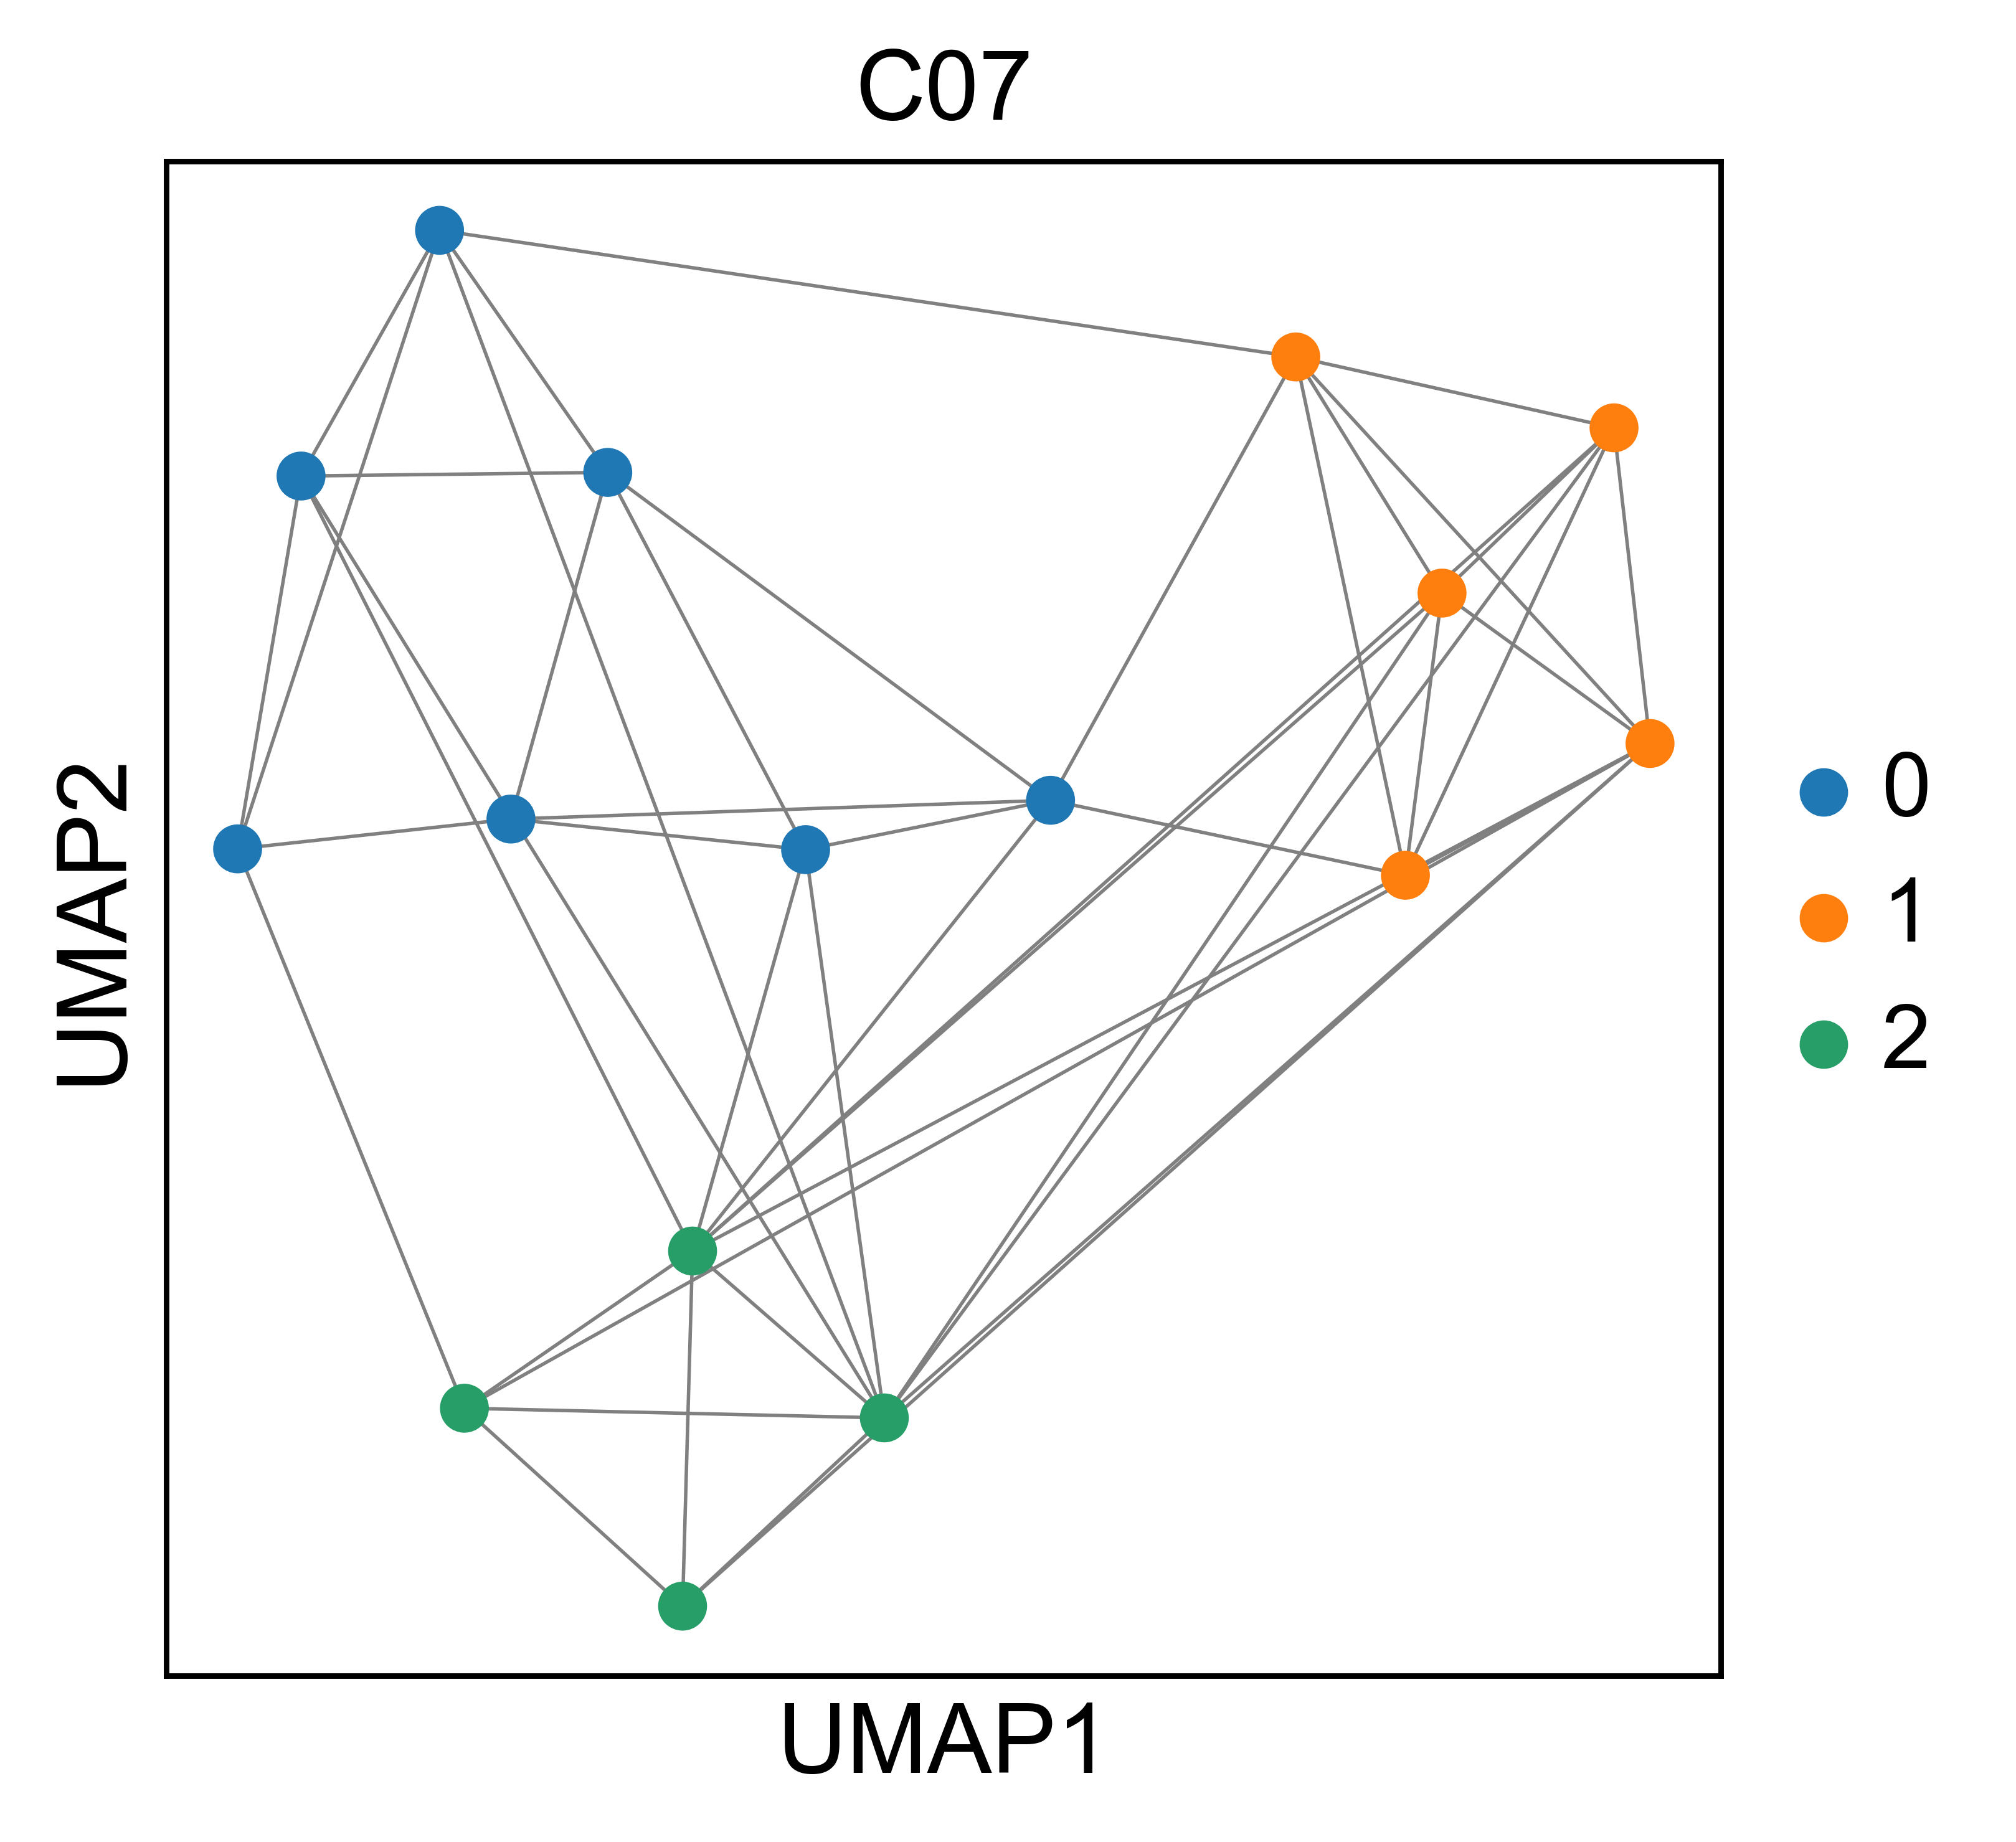

writing '.csv' files to outputC07


C08
AnnData object with n_obs × n_vars = 41 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 41
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 41
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


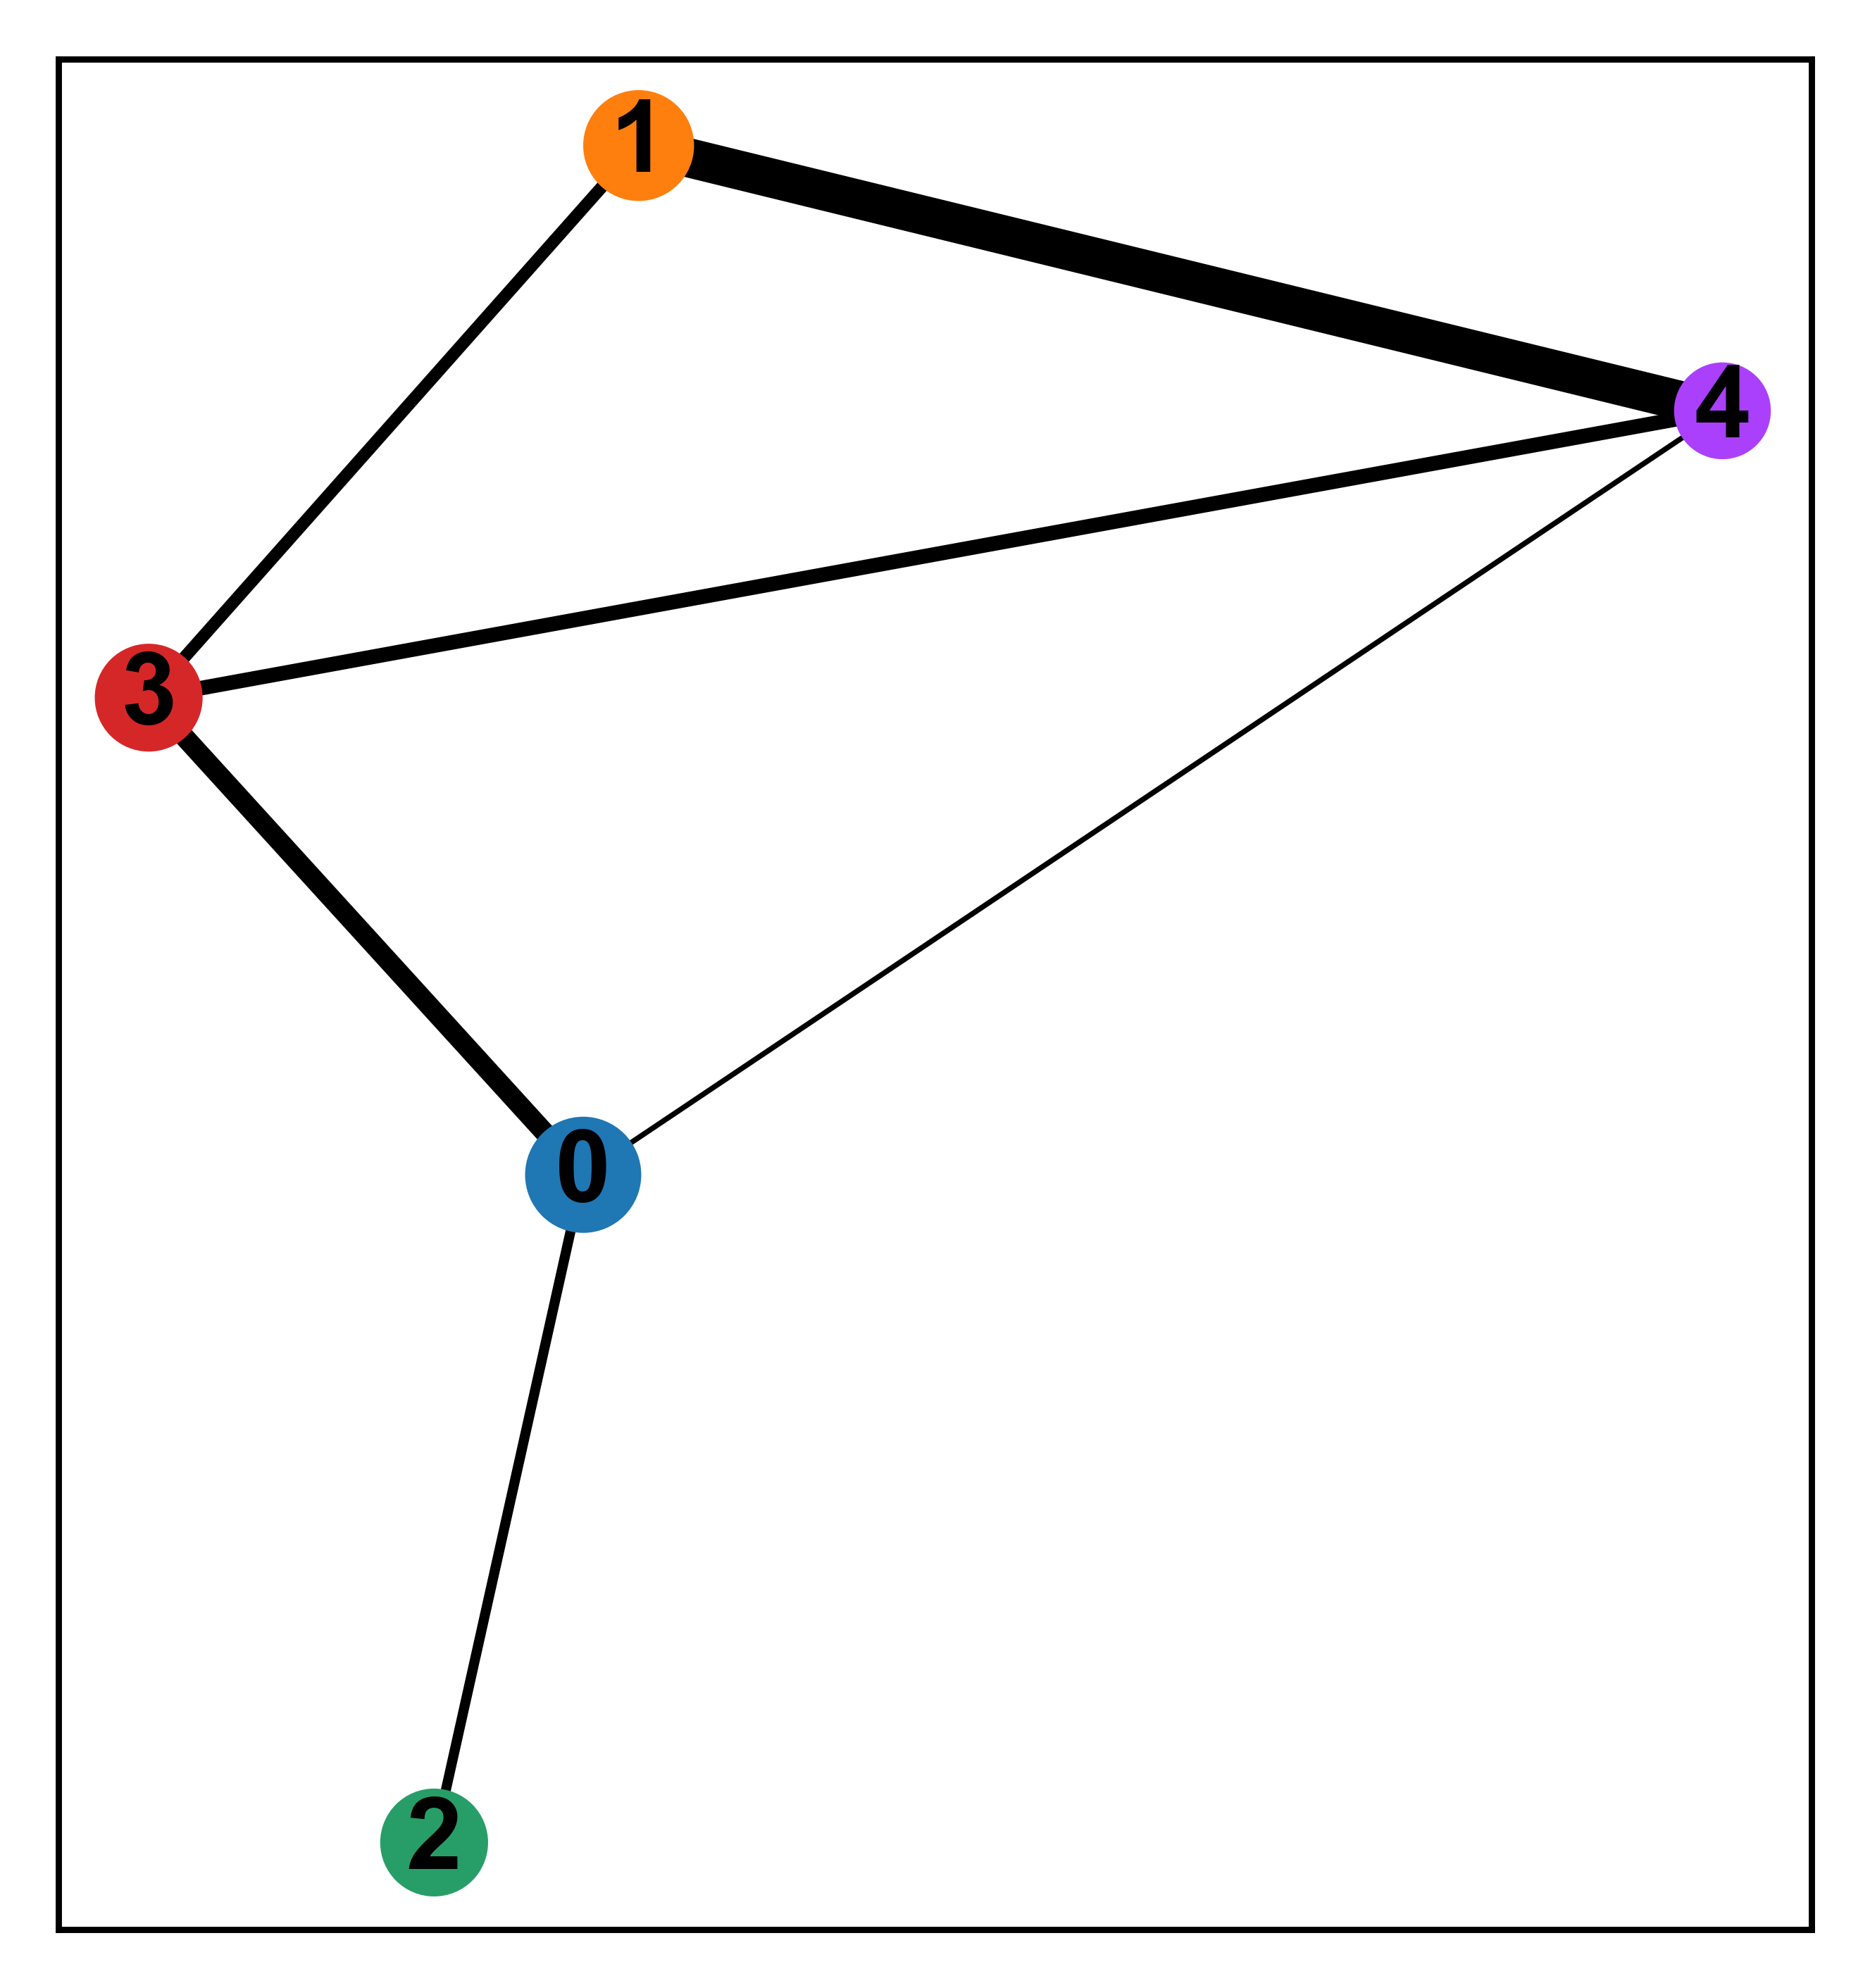

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


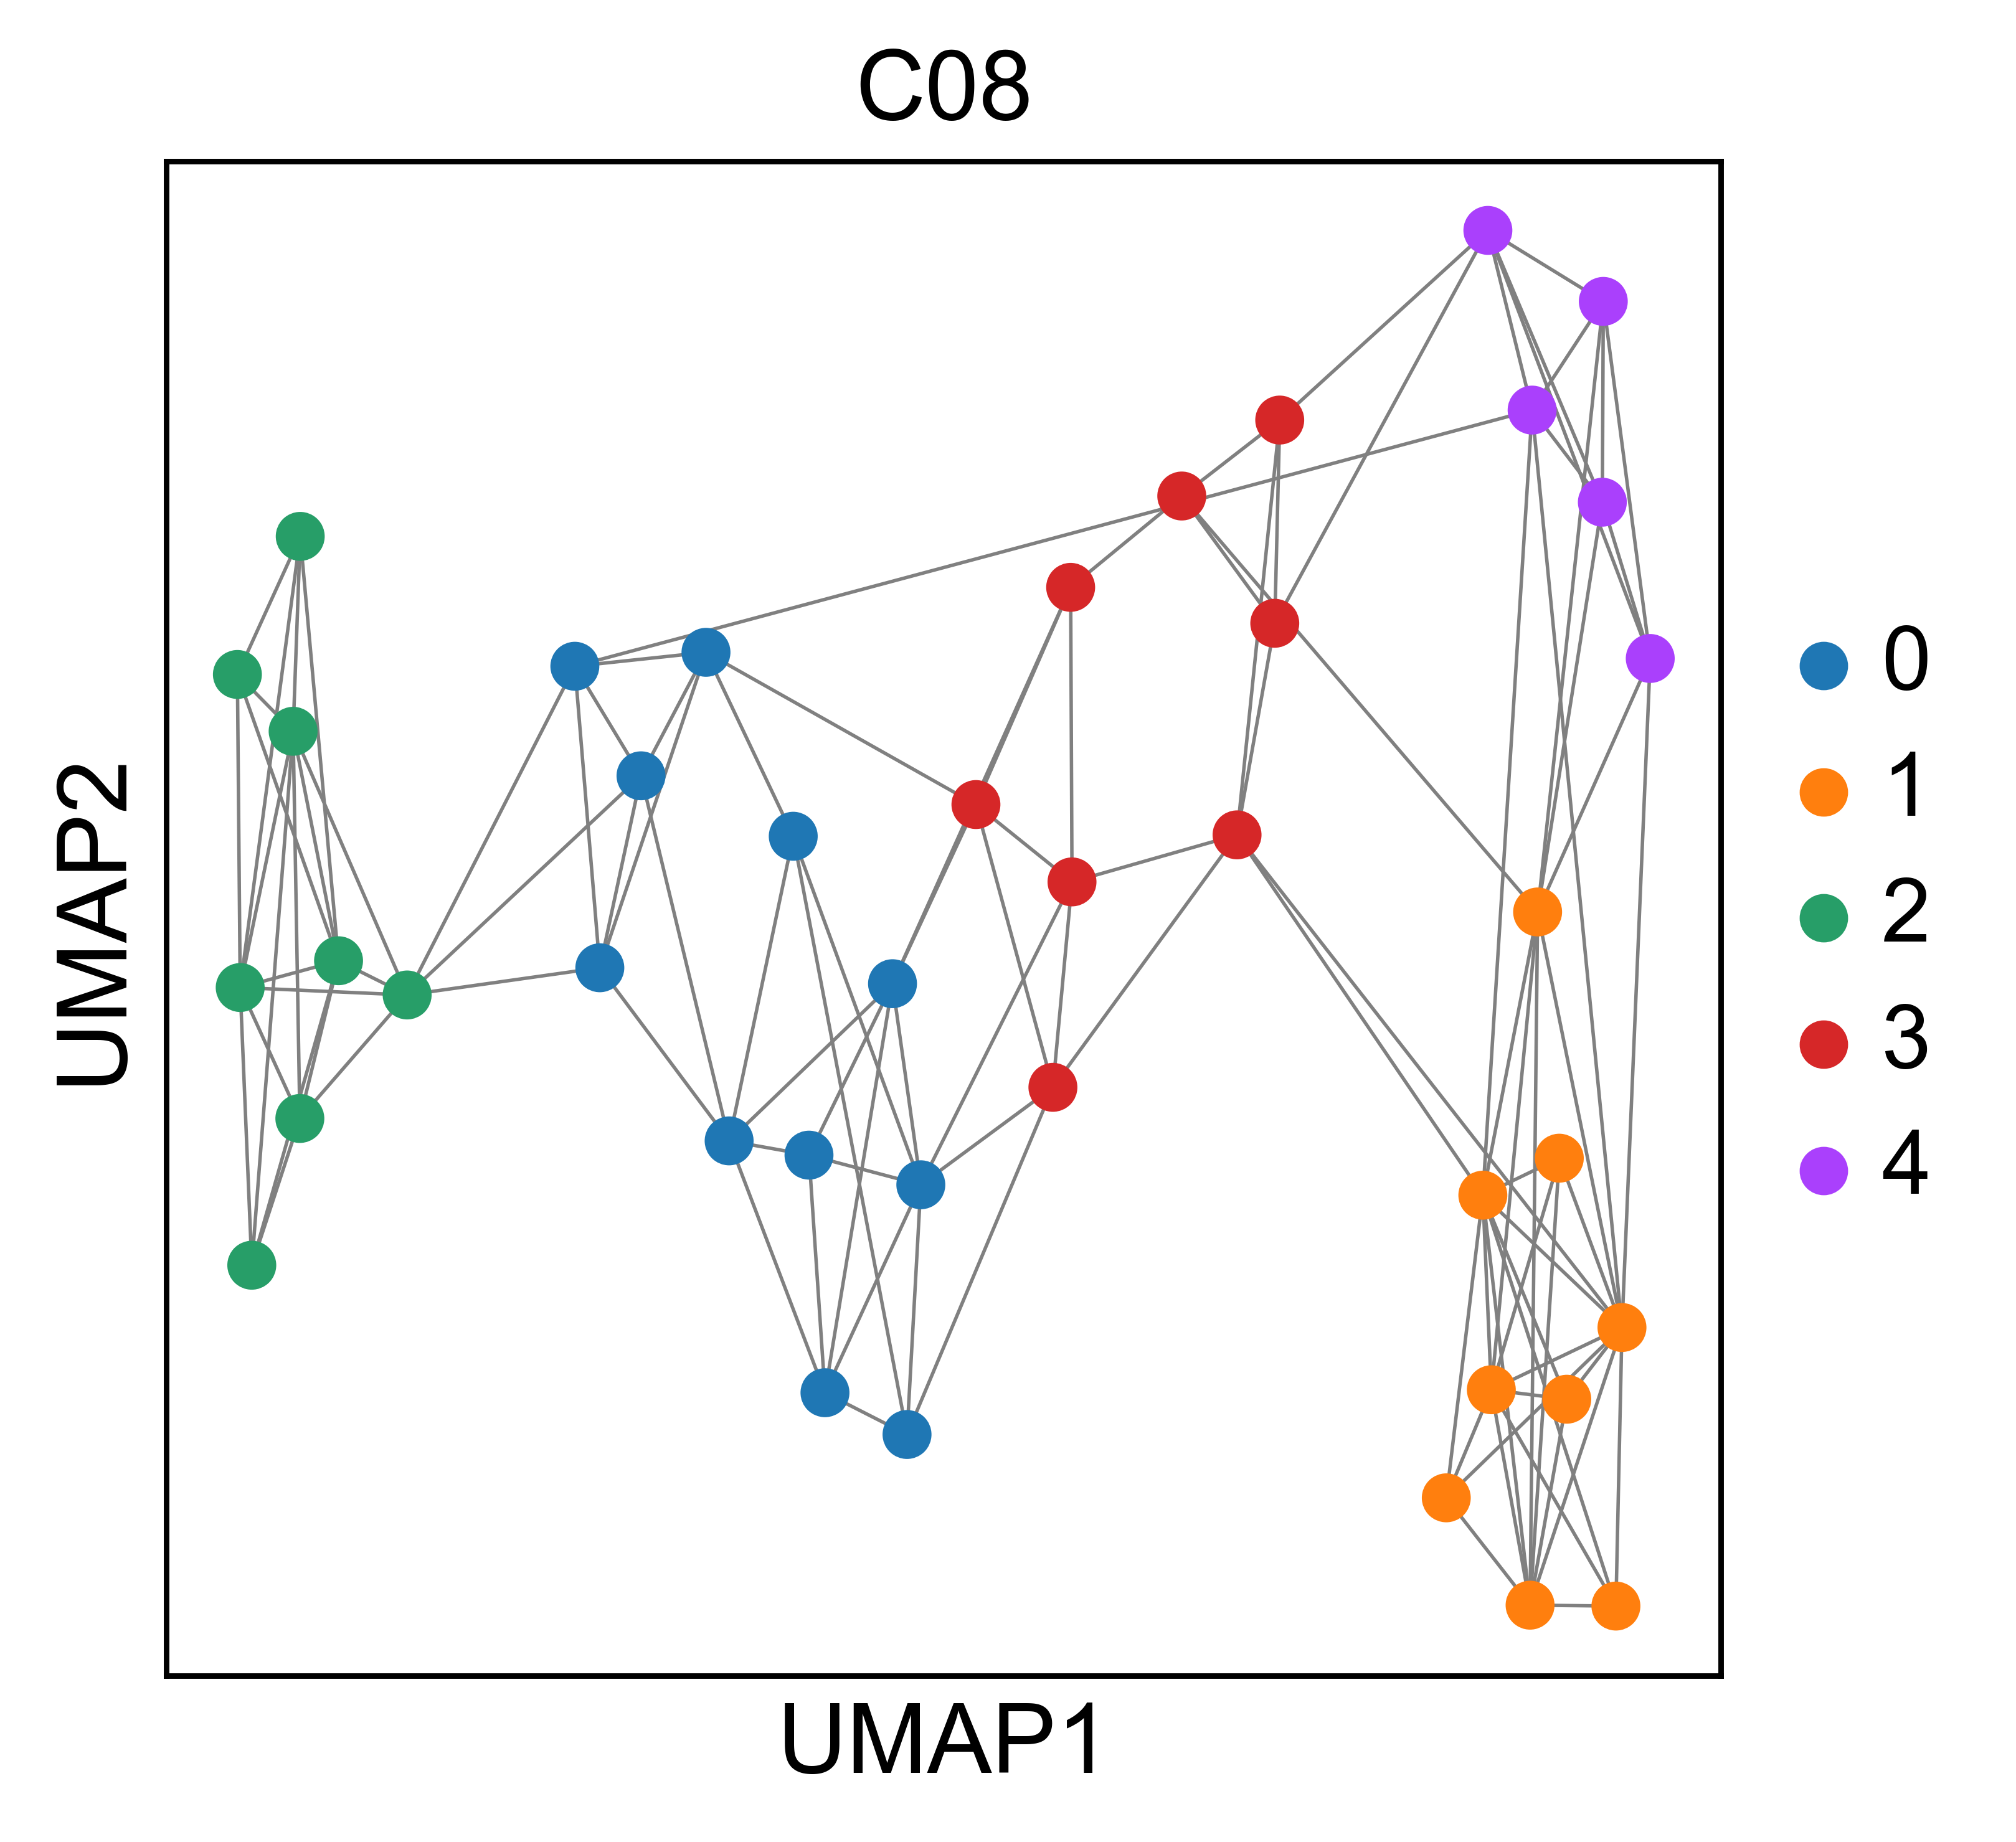

writing '.csv' files to outputC08


C09
AnnData object with n_obs × n_vars = 160 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 160
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 160
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 15 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


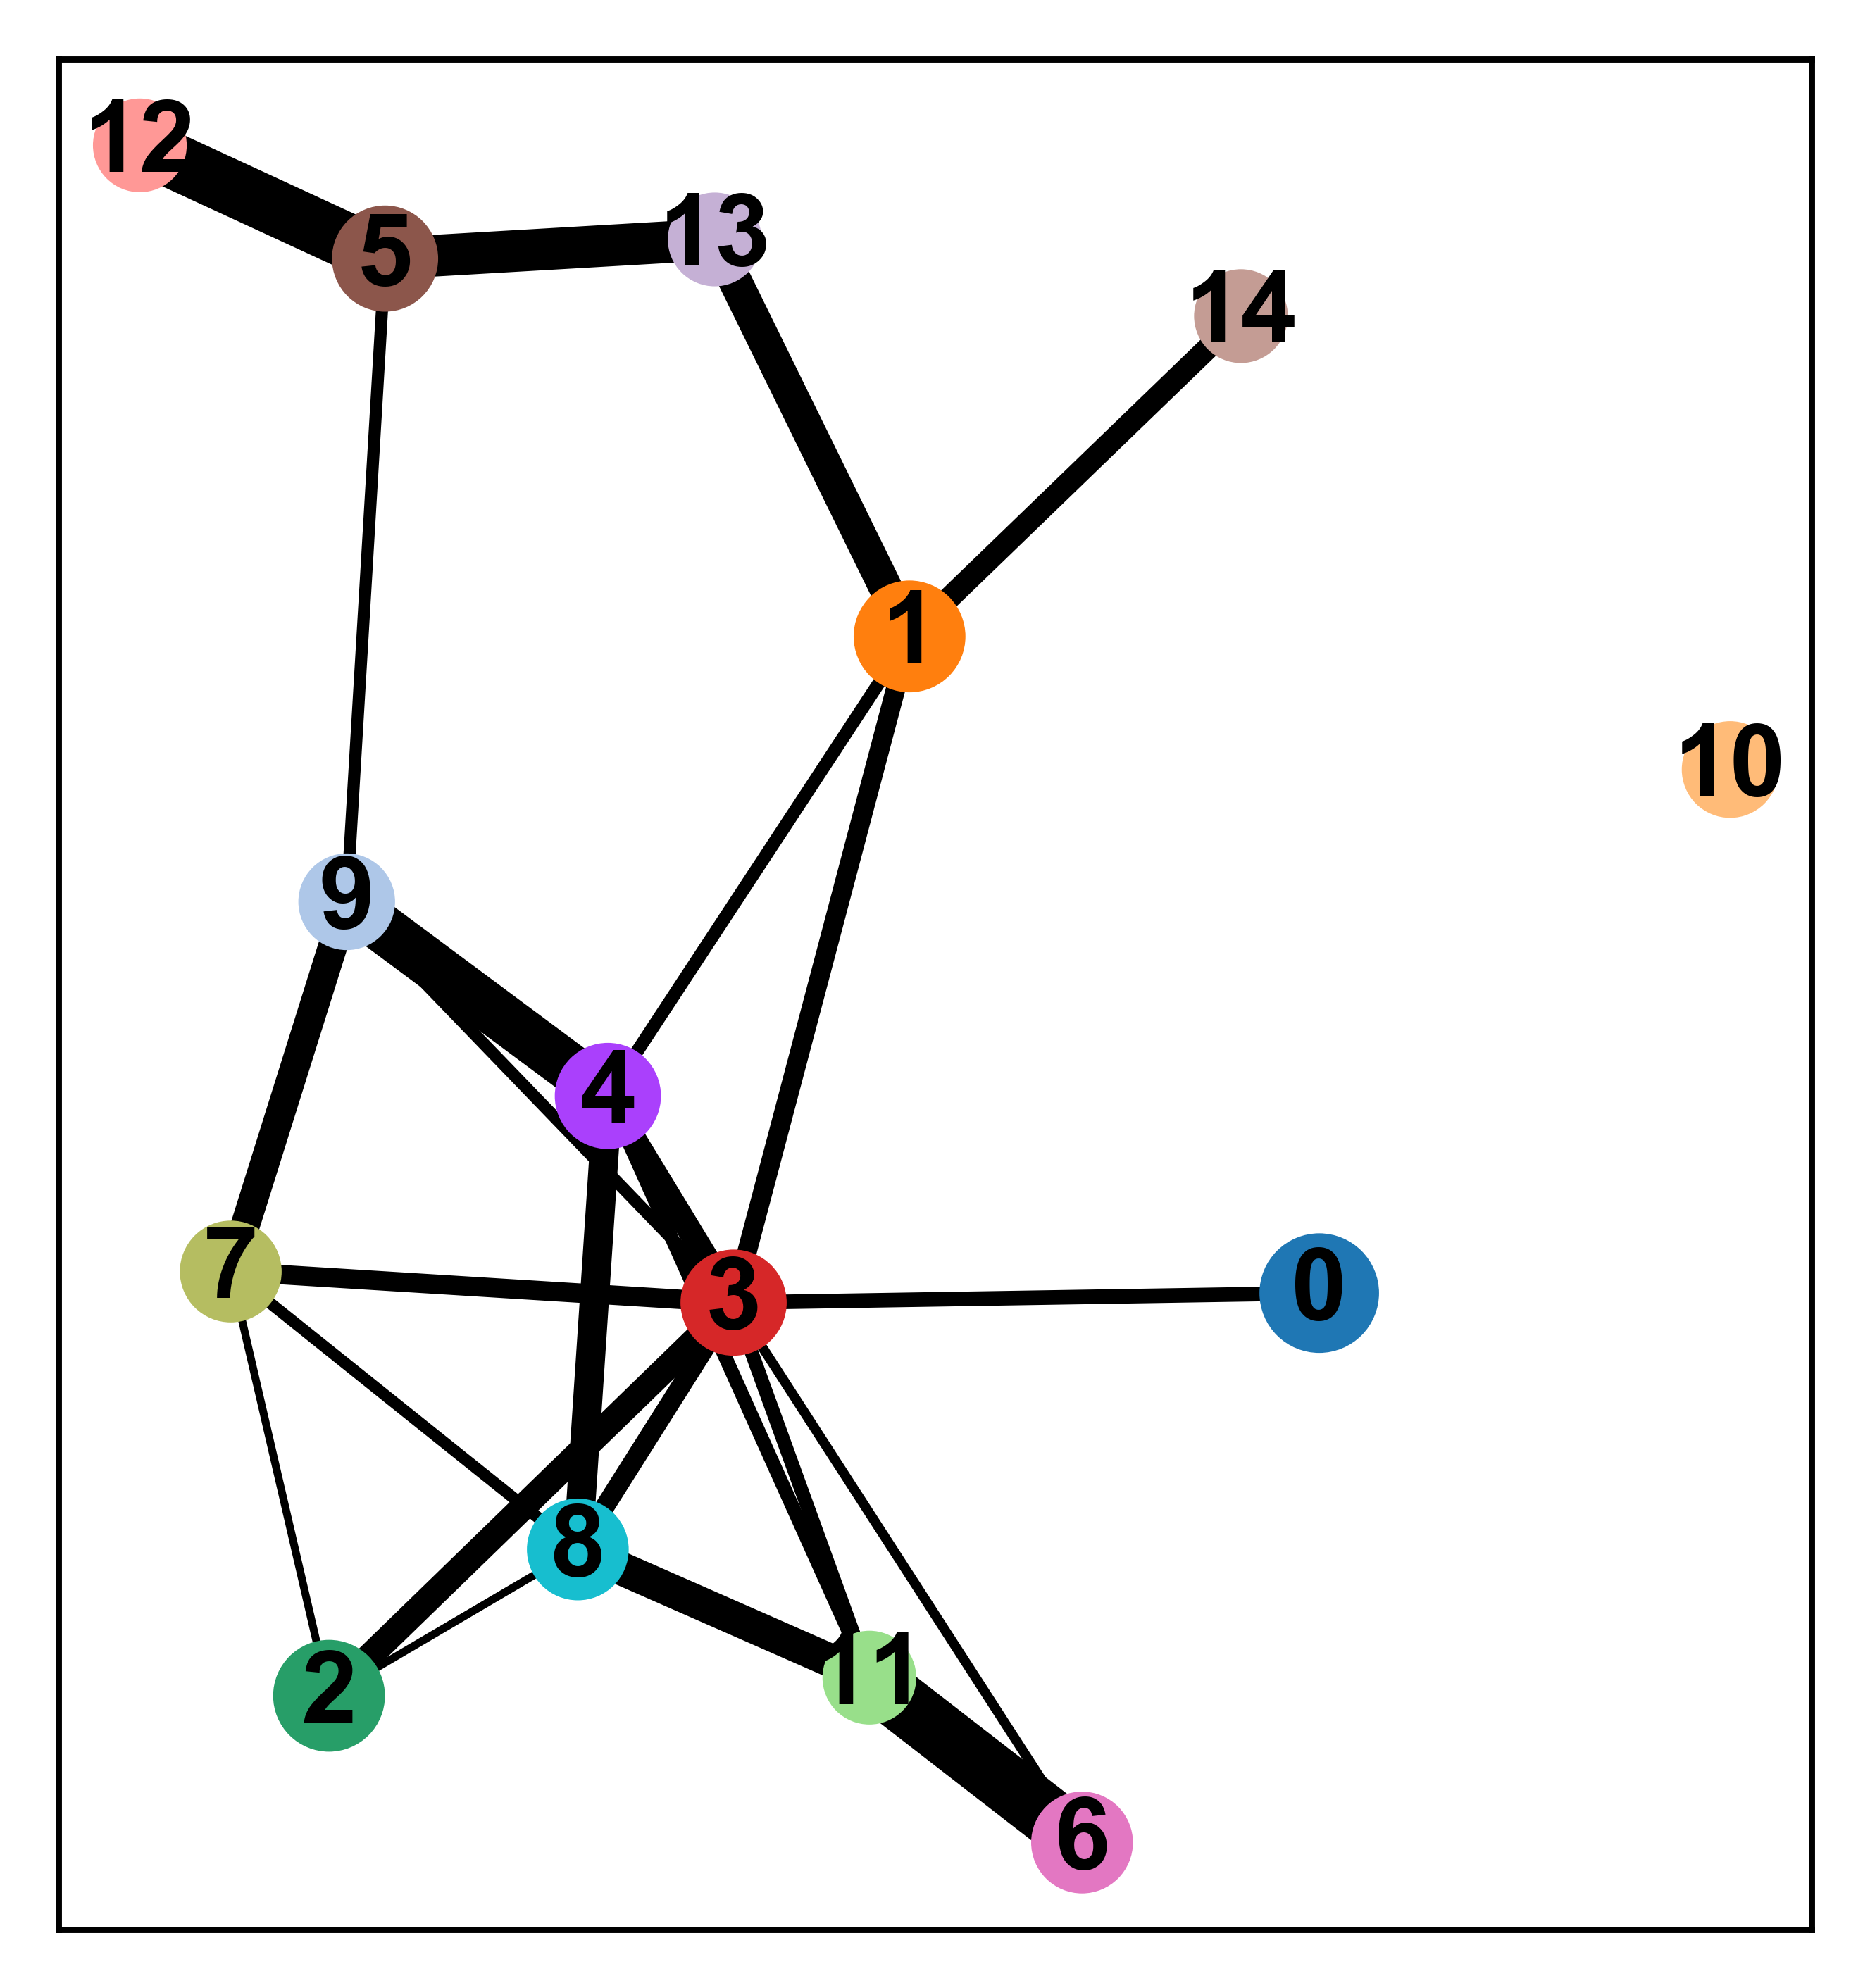

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/Users/alexgraudenzi/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


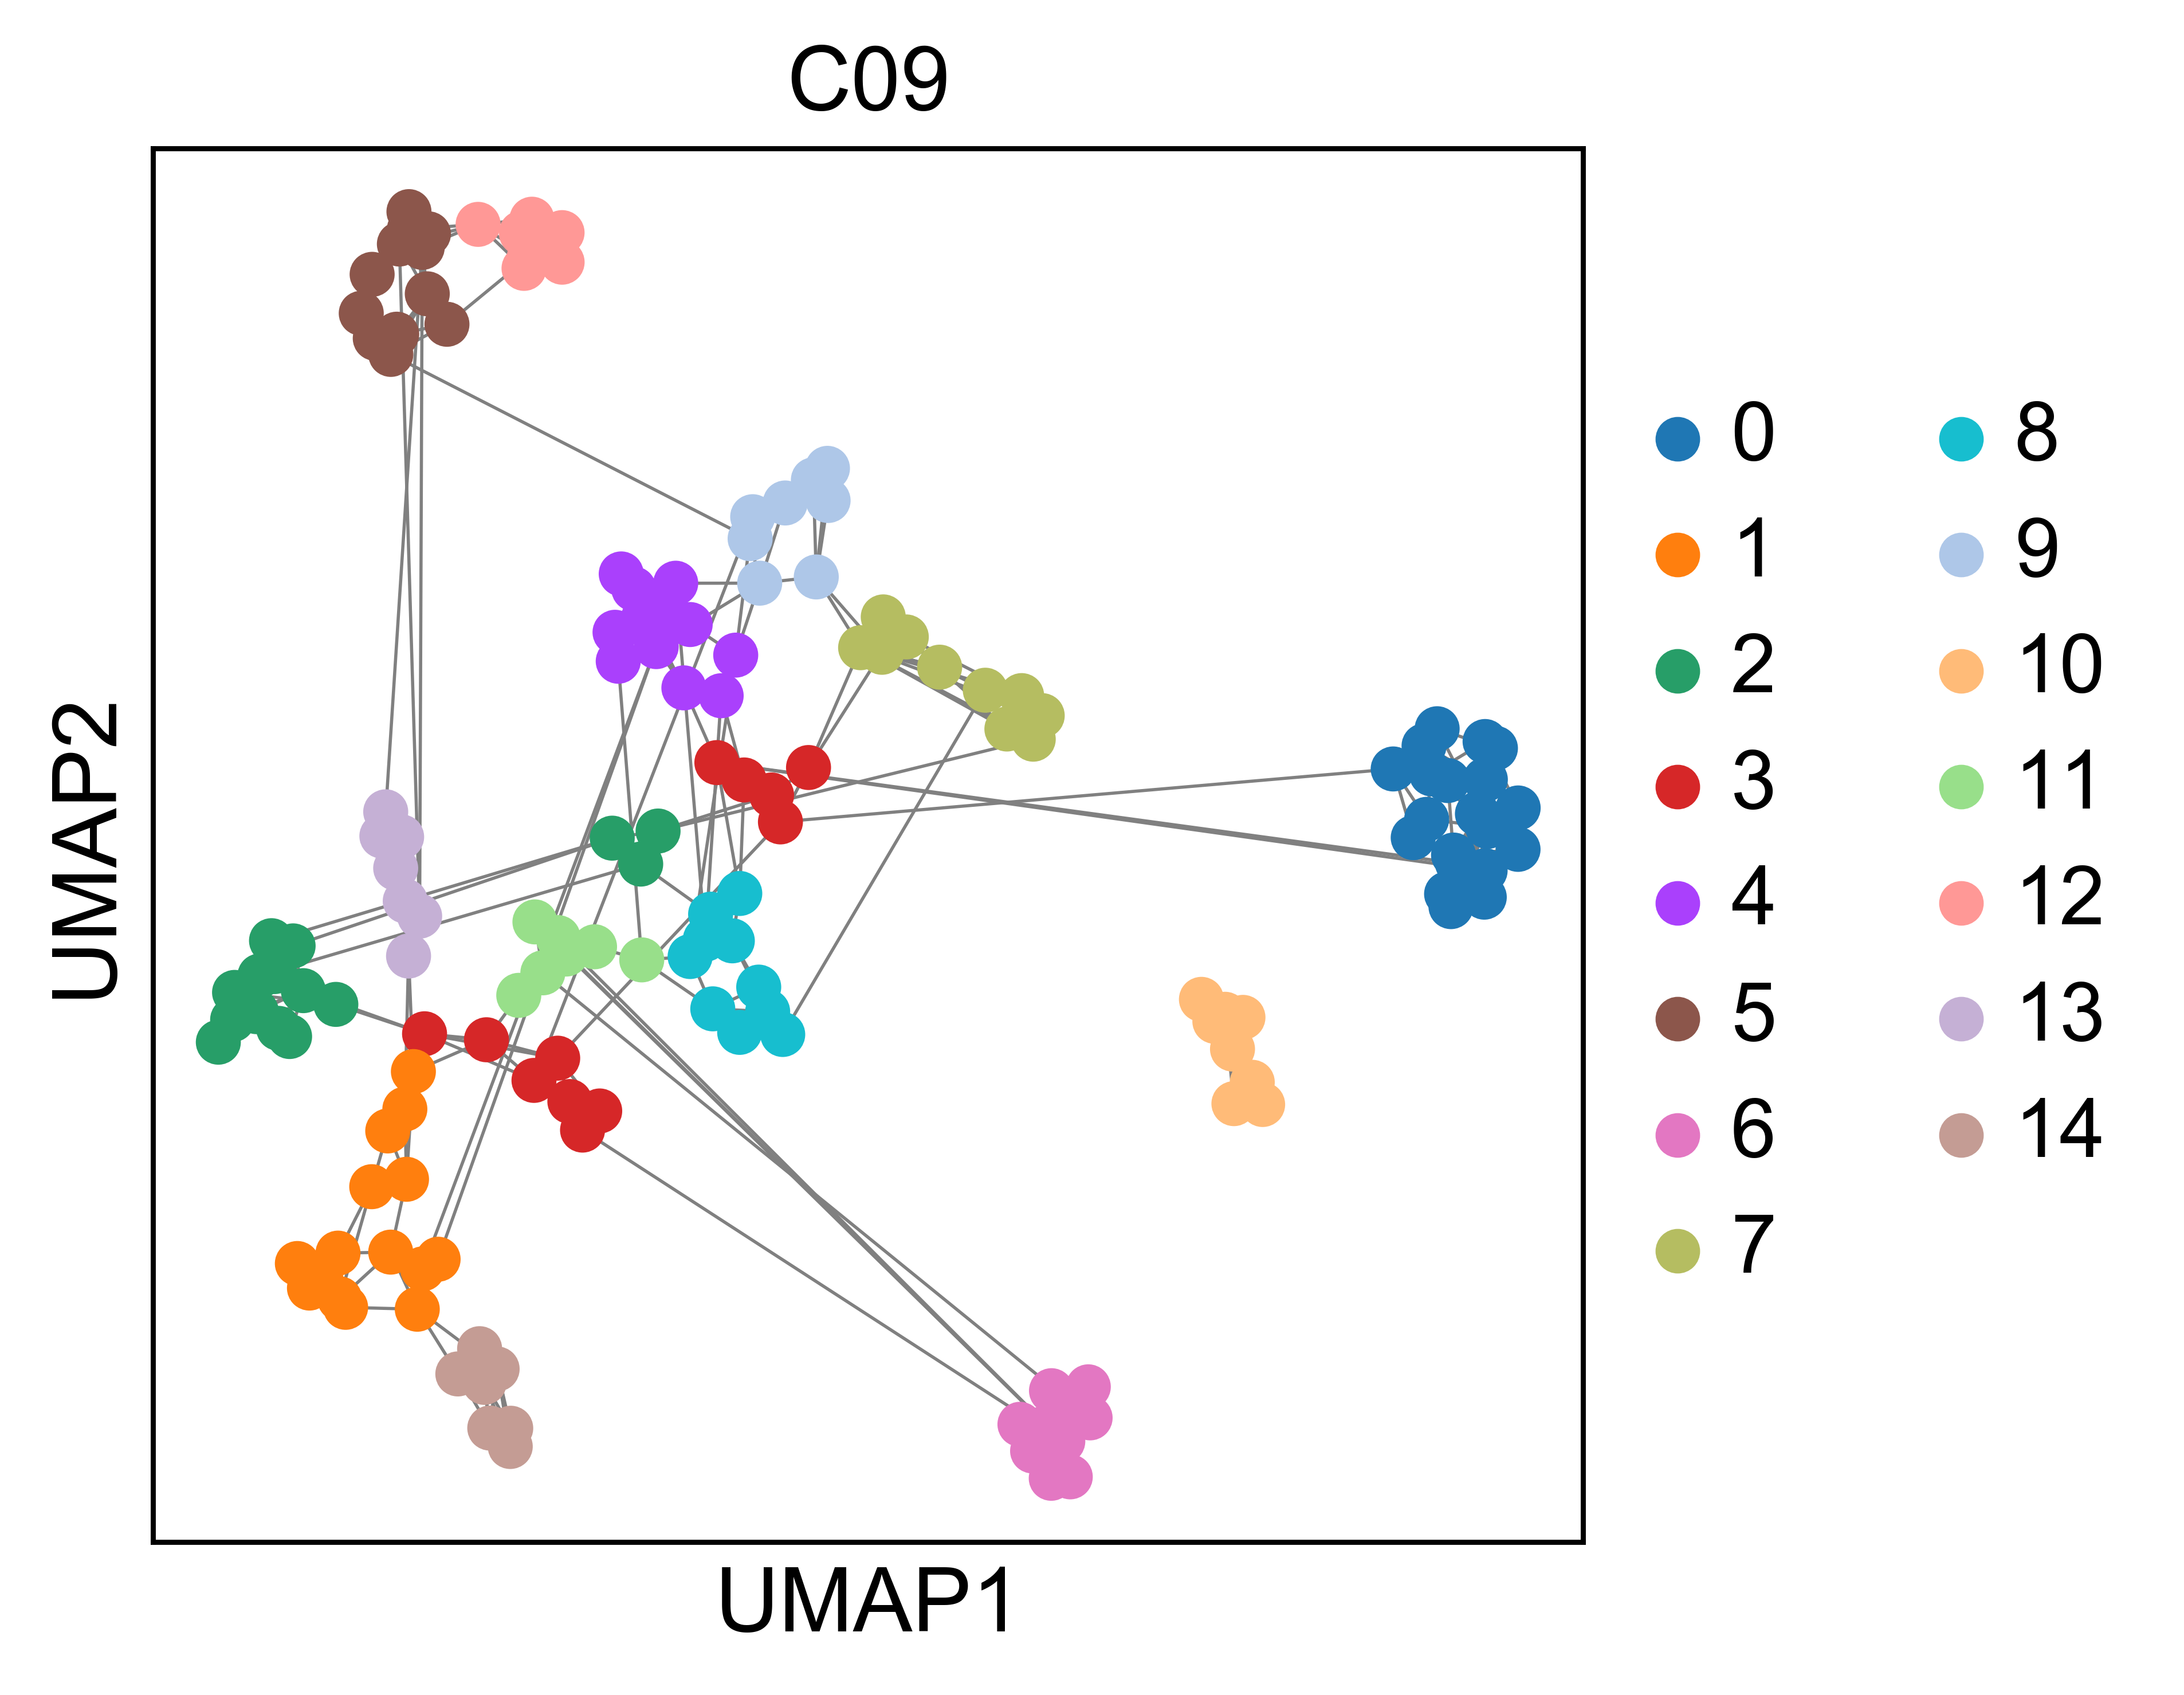

writing '.csv' files to outputC09


C10
AnnData object with n_obs × n_vars = 150 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
AnnData object with n_obs × n_vars = 1003 × 9899 
    obs: 'Country', 'DateGISAID', 'Signature_Cluster', 'Clade', 'nClonal', 'nMinor'
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 150
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 150
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'Country' as categorical
... storing 'DateGISAID' as categorical
... storing 'Signature_Cluster' as categorical
... storing 'Clade' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


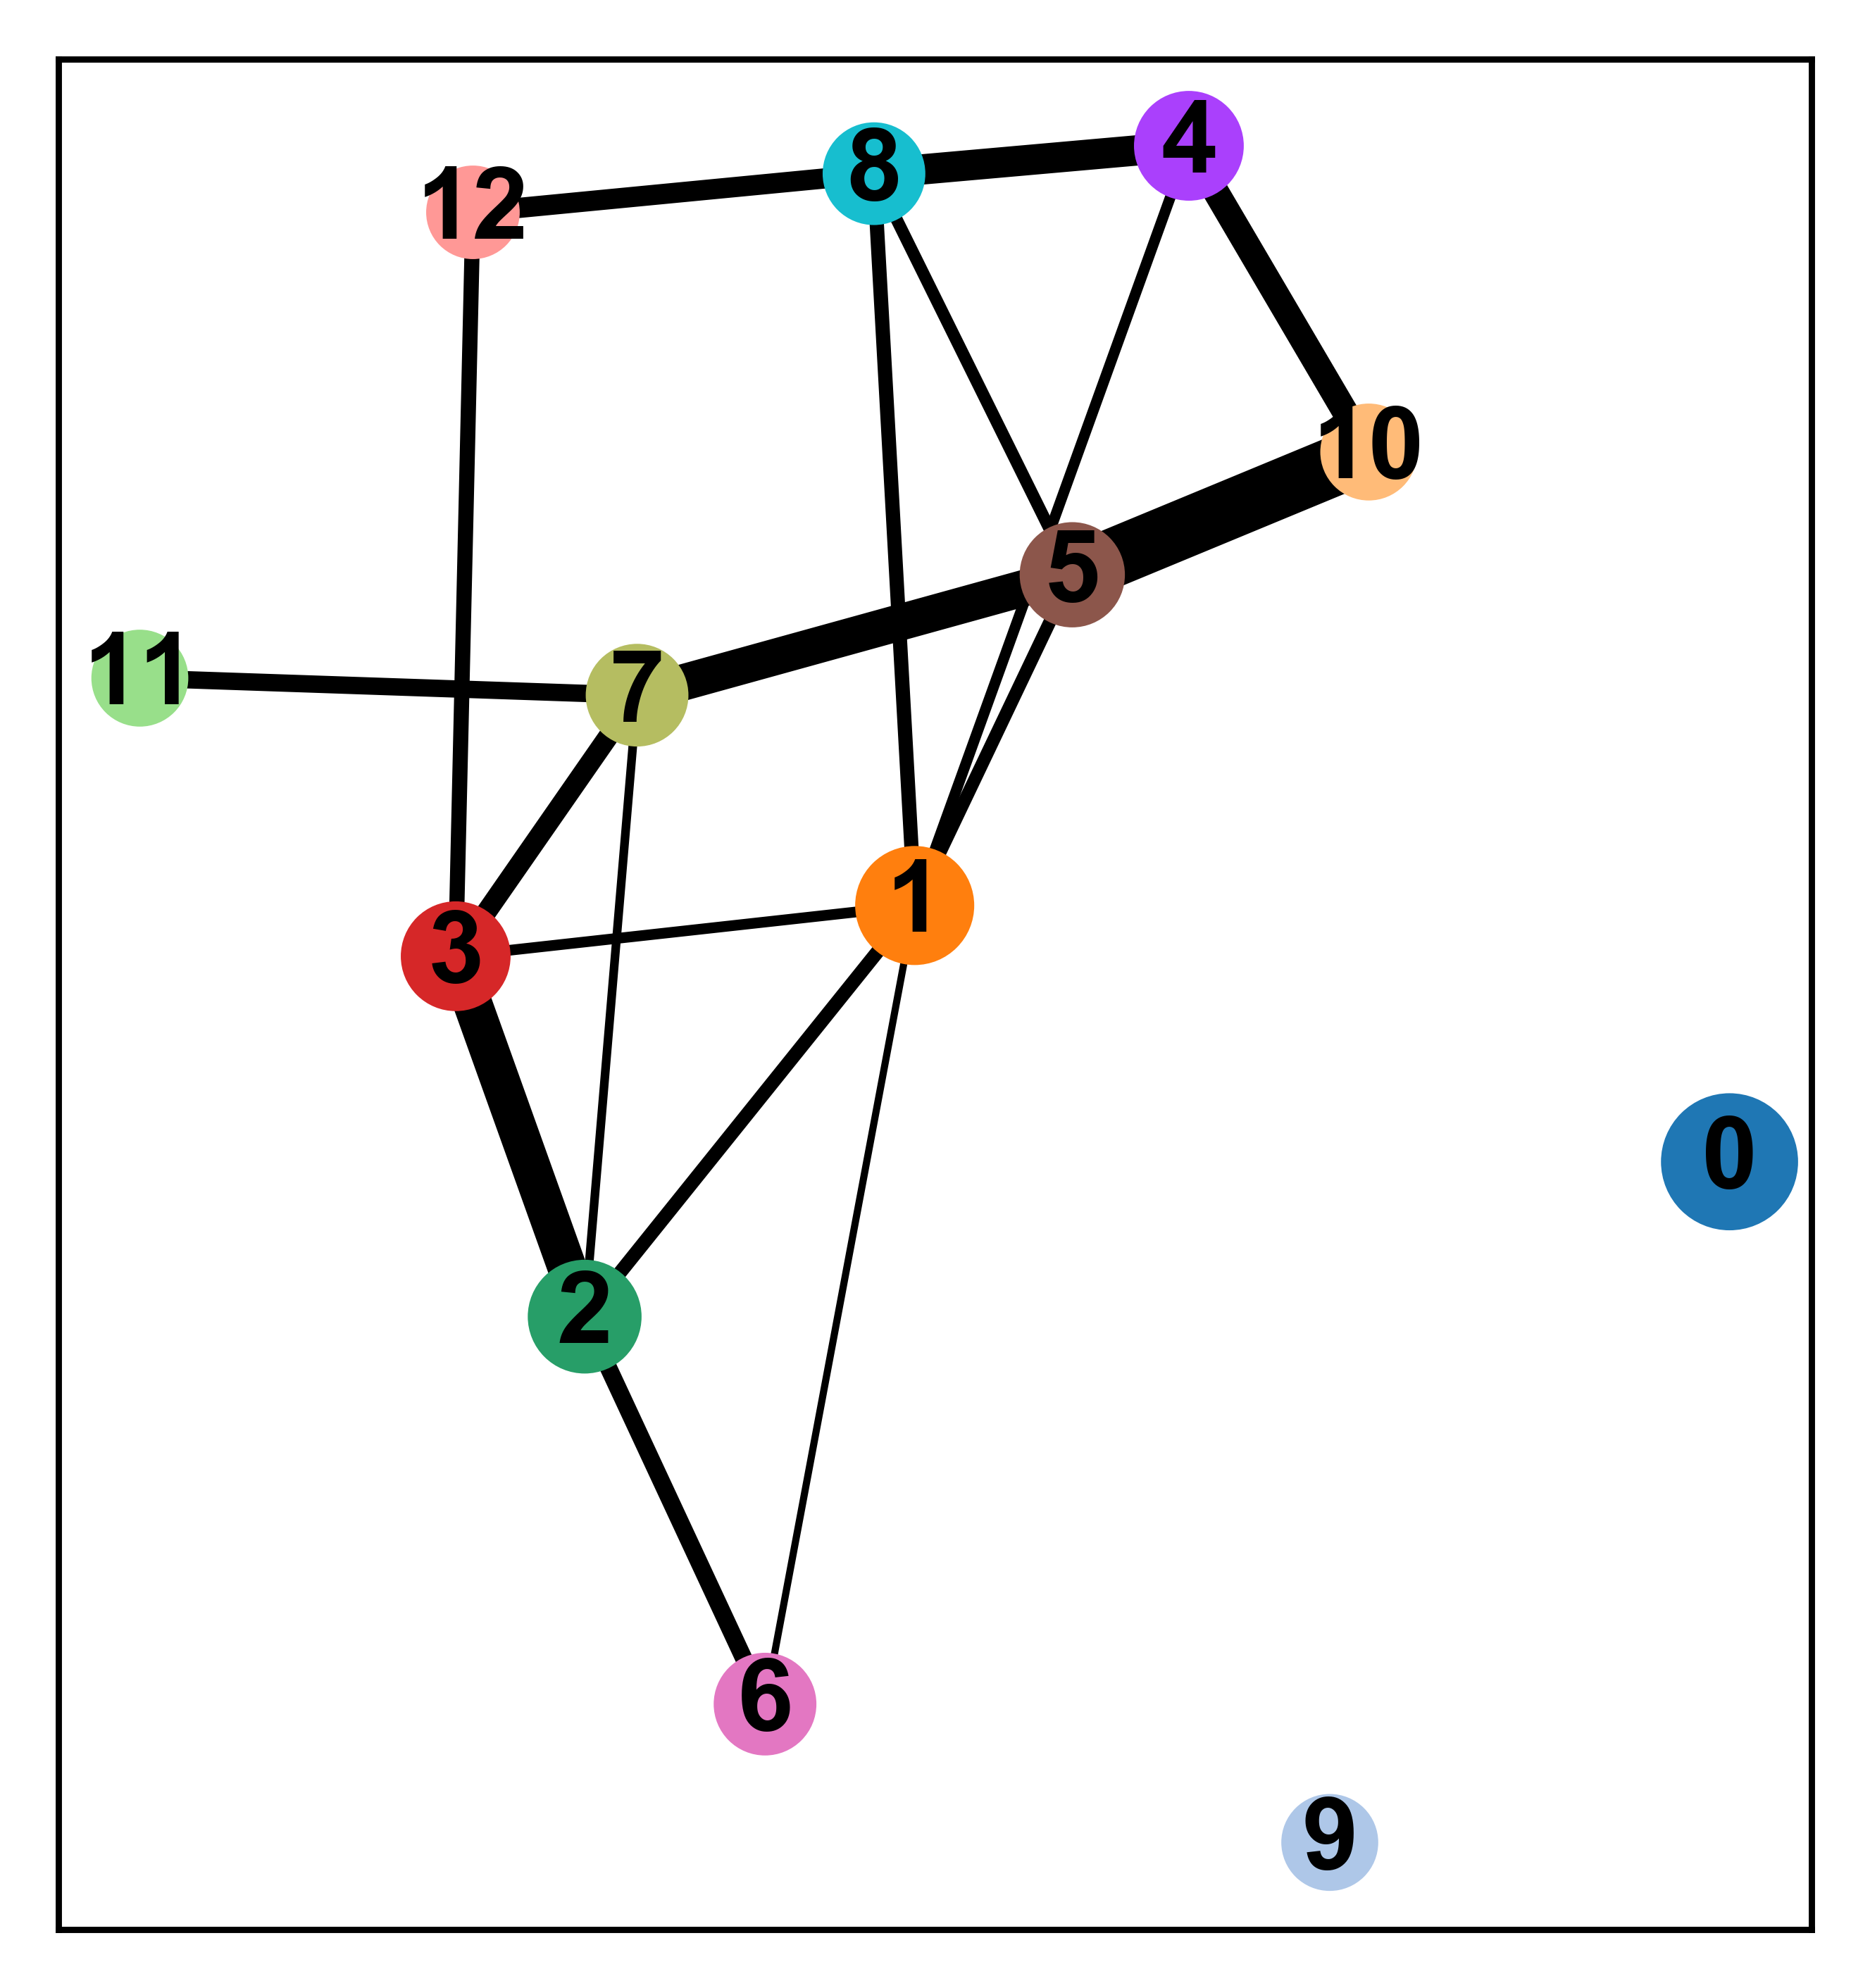

In [ ]:
how_many_clusters = 13
how_many_clusters
for x in range(how_many_clusters):
    y = x + 1
    if y<10:
        print('C'+ str(0)+str(y))
        temp = ('C'+ str(0)+str(y))
    else: 
        print('C'+str(y))
        temp = ('C'+str(y))
        
    adata_all_cluster = adata_all[adata_all.obs['Clade'] == temp].copy()
    
    how_many_samples = len(adata_all_cluster.obs)
    how_many_variables = len(adata_all_cluster.var)
    print(adata_all_cluster)
    print(adata_all)
    
    sc.pp.pca(adata_all_cluster, n_comps=how_many_samples,zero_center = 'False',random_state=1)
    #sc.pp.neighbors(adata_all_cluster, knn = 'TRUE', n_neighbors=5, random_state=1,metric = 'braycurtis', method = "umap")
    sc.pp.neighbors(adata_all_cluster,knn = 'TRUE', n_neighbors=5,random_state=1,metric = 'braycurtis', method = "umap")
    sc.tl.leiden(adata_all_cluster, key_added='groups', random_state=1,resolution = 1)
    
    sc.tl.paga(adata_all_cluster, groups='groups', use_rna_velocity=False, model='v1.2', copy=False)
    sc.pl.paga(adata_all_cluster, random_state = 0,save = temp+'_paga.svg')
        
    #compute positions from PAGA
    how_many_groups = len(np.unique(adata_all_cluster.obs['groups']))
    vettore_posizione = ['NA']*how_many_samples
    for i in range(how_many_samples):
        for j in range(how_many_groups):
            if int(adata_all_cluster[i].obs['groups'])== j:
                    vettore_posizione[i]=(adata_all_cluster.uns['paga']['pos'][j])

    #sc.tl.umap(adata_all_cluster, init_pos=np.float32(vettore_posizione),  random_state=1)
    sc.tl.umap(adata_all_cluster, random_state=1, spread = 2, min_dist = 1)
    
    temp_file = temp+'.svg'
    temp_output = 'output'+temp+'.csv'

    sc.pl.umap(adata_all_cluster, color=['groups'], legend_loc='right margin', edges = 'TRUE', edges_width = 0.5, size = 200,  title = temp ,save = temp_file)
    adata_all_cluster.write_csvs(temp_output)

#    